# 选择**数据集Titanic-data**作为本项目分析对象。


### 探索性分析    
**首先，对各因素与生还情况的关系进行探索性分析**
这些因素包括：年龄、性别、舱级、舱位等已有的数据资料。

### 特征工程
**对各因素间的相互影响进行分析，并建立新的特征**

### 建模
**建模对生还情况进行预测分析**
<br>

## 导入库 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline
sns.set_style("white",{'axes.spines.right':False,'axes.spines.top':False,\
               'font.family': ['sans-serif'],'font.sans-serif': ['Microsoft Yahei']})

## 导入数据
同时导入训练集和测试集，便于统一清洗和整理。

In [2]:
titanic_train = pd.read_csv('./titanic-data.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_test = pd.read_csv('./test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_df = pd.concat([titanic_train,titanic_test],axis=0,sort=False,ignore_index=True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


统计该数据集中所有人数，以及生还的人数。  
从如上分析结果可知，**该数据集中共统计乘客人数1309人，其中生还数据有891条，因为测试集无此数据，有生还信息的数据中生还率为0.38**    
<br>
## 清洗数据

In [6]:
titanic_clean = titanic_df.copy()
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
print(pd.isnull(titanic_clean).sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [8]:
def missing_rate(df):
    return pd.isnull(df).sum()/pd.isnull(df).count()

missing_rate(titanic_df)

PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

#### 因列Cabin的值缺失率太高，暂以空值作为其中一种类型'U'。

In [9]:
titanic_clean['Cabin'].fillna('Unknown',inplace=True)
titanic_clean['Cabin_attr'] = titanic_clean['Cabin'].apply(lambda x:x[0])
titanic_clean['Cabin_attr'].value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin_attr, dtype: int64

In [10]:
titanic_clean.loc[(titanic_clean.Cabin != 'Unknown') & (titanic_clean['Cabin_attr'] == 'U'),'PassengerId'].count()

0

避免因之前填空的‘Unknown'造成与原有的Cabin首字母存在冲突。

#### Embarked列有两个空值，数量较少，查看一下详情。 

In [11]:
titanic_clean.loc[titanic_clean.Embarked.isnull(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_attr
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


缺失该数据的为一等舱的女性，且Ticket号码、Cabin和Fare均一致，推测为同一批登船者。

In [12]:
titanic_clean.pivot_table('Fare',['Pclass','Embarked','Cabin_attr'])

Fare
Pclass Embarked Cabin_attr            
1      C        A            35.209473
                B           167.461069
                C           106.259044
                D            75.736725
                E            99.071591
                U            88.697910
       Q        C            90.000000
       S        A            47.279155
                B            78.585352
                C           110.369588
                D            47.707292
                E            46.435326
                T            35.500000
                U            55.325114
2      C        D            13.893750
                U            24.868400
       Q        E            12.350000
                U            11.632633
       S        D            13.000000
                E            11.333333
                F            23.423077
                U            21.283817
3      C        F            12.272233
                U            10.983340
       Q        F             7.750000
                U            10.414399
       S        E            11.000000
                F             7.650000
                G            14.205000
                U            14.515505

从上可看出，客舱号在B开头的是在C或者S登船，从票价上来看，与S登船的平均票价比较相符，Emabrked以S来填空。

In [13]:
titanic_clean.loc[titanic_clean.Embarked.isnull(),'Embarked'] = 'S'

** Fare列有一个空值。**

In [14]:
titanic_clean.loc[titanic_clean.Fare.isnull(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_attr
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Unknown,S,U


In [15]:
titanic_clean.loc[(titanic_clean.Pclass == 3) & (titanic_clean.Embarked == 'S'),:].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,495.000000,353.000000,495.0,399.000000,495.000000,495.000000,494.000000
mean,628.549495,0.189802,3.0,25.247068,0.660606,0.472727,14.435422
std,375.948292,0.392701,0.0,11.826986,1.461366,1.097828,13.118281
min,1.000000,0.000000,3.0,0.170000,0.000000,0.000000,0.000000
25%,294.500000,0.000000,3.0,19.000000,0.000000,0.000000,7.854200
50%,629.000000,0.000000,3.0,24.000000,0.000000,0.000000,8.050000
75%,944.500000,0.000000,3.0,32.000000,1.000000,0.000000,15.900000
max,1308.000000,1.000000,3.0,74.000000,8.000000,9.000000,69.550000


In [16]:
titanic_clean.loc[(titanic_clean.Pclass == 3) & (titanic_clean.Embarked == 'S'),:].Fare.mode()

0    8.05
dtype: float64

在S登船的三等舱，中位数票价与众数值相同，选择以中位数填空。

In [17]:
titanic_clean.loc[titanic_clean.Fare.isnull(),'Fare'] = 8.05

#### Age空值率相对较高。  
从是否生还、名字信息及位于何等舱等不同情况下分析Age是否存在差异。

In [18]:
titanic_noAge = titanic_clean.loc[titanic_clean.Age.isnull(),:]
titanic_noAge.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,263.000000,177.000000,263.000000,0.0,263.000000,263.000000,263.000000
mean,653.558935,0.293785,2.642586,NaN,0.482890,0.243346,19.823319
std,380.161812,0.456787,0.726812,NaN,1.448443,0.949941,27.550667
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,335.500000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,630.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,999.500000,1.000000,3.000000,NaN,0.000000,0.000000,22.804150
max,1309.000000,1.000000,3.000000,NaN,8.000000,9.000000,227.525000


缺失年龄数据的部分，生还率0.29低于整体的0.38；   
Pclass平均值为2.6要大于整体的2.3，且25%值已经是3；  
Fare在平均值、四分位及最大值方面均低于整体，但标准差会更小，说明数据更为集中在中下水平。

In [19]:
titanic_clean.pivot_table('Age',['Pclass'])

,Age
Pclass,
1,39.159930
2,29.506705
3,24.816367


不同等级的船舱，平均年龄存在一定的差异，一等舱>二等舱>三等舱

In [20]:
titanic_clean.Name.sample(10)

1123                              Wiklund, Mr. Karl Johan
650                                     Mitkoff, Mr. Mito
608     Laroche, Mrs. Joseph (Juliette Marie Louise La...
472               West, Mrs. Edwy Arthur (Ada Mary Worth)
1085                        Drew, Master. Marshall Brines
147                      Ford, Miss. Robina Maggie "Ruby"
561                                     Sivic, Mr. Husein
613                                      Horgan, Mr. John
331                                   Partner, Mr. Austen
442                             Petterson, Mr. Johan Emil
Name: Name, dtype: object

对Name列中的称呼抬头进行提取，有诸如性别、头衔等信息。

In [21]:
titanic_clean['title'] = titanic_clean['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())
pd.crosstab(titanic_clean.title,titanic_clean.Sex)

Sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


只有title为Dr时出现同时存在男性和女性的情况,且人数较少，查看一下具体情况。

In [22]:
titanic_clean.loc[(titanic_clean.title == 'Dr'),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_attr,title
245,246,0.0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,C,Dr
317,318,0.0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,Unknown,S,U,Dr
398,399,0.0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,Unknown,S,U,Dr
632,633,1.0,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,B,Dr
660,661,1.0,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,Unknown,S,U,Dr
766,767,0.0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,Unknown,C,U,Dr
796,797,1.0,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,D,Dr
1184,1185,NaN,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S,A,Dr


仅有一位男性的年龄缺失，对于Dr职位的人来说，在年龄方面会稍长一些，从上面的数据可知多数在50岁左右，少数较为年轻，对该年龄空值以同性别的平均年龄进行填空。

In [23]:
titanic_clean.loc[titanic_clean.Age.isnull() & (titanic_clean.title == 'Dr'),'Age'] = \
titanic_clean.loc[(titanic_clean.Sex == 'male') & (titanic_clean.title == 'Dr'),'Age'].mean()

In [24]:
titanic_clean.pivot_table('Age',['title','Pclass'])

Age
title        Pclass           
Capt         1       70.000000
Col          1       54.000000
Don          1       40.000000
Dona         1       39.000000
Dr           1       45.111111
             2       38.500000
Jonkheer     1       38.000000
Lady         1       48.000000
Major        1       48.500000
Master       1        6.984000
             2        2.757273
             3        6.090000
Miss         1       30.338983
             2       20.717083
             3       17.360874
Mlle         1       24.000000
Mme          1       24.000000
Mr           1       41.450758
             2       32.346715
             3       28.318910
Mrs          1       43.208955
             2       33.518519
             3       32.326531
Ms           2       28.000000
Rev          2       41.250000
Sir          1       49.000000
the Countess 1       33.000000

In [25]:
pd.crosstab(titanic_clean.title,titanic_clean.Pclass)

Pclass,1,2,3
title,,,
Capt,1,0,0
Col,4,0,0
Don,1,0,0
Dona,1,0,0
Dr,6,2,0
Jonkheer,1,0,0
Lady,1,0,0
Major,2,0,0
Master,5,11,45


In [26]:
pd.crosstab(titanic_clean.loc[titanic_clean.Age.isnull(),:].title,\
            titanic_clean.loc[titanic_clean.Age.isnull(),:].Pclass)

Pclass,1,2,3
title,,,
Master,0,0,8
Miss,1,2,47
Mr,27,13,136
Mrs,10,1,16
Ms,0,0,1


综上分析，Mr, Mrs和Miss各等舱的人数均较多，且不同舱的平均年龄存在一定差异，考虑以不同title和Pclass的平均值填空；   
Master仅缺3等舱的Age数据，且3等舱人数达45人，考虑以三等舱的该头衔的平均值填空；  
而Ms人数仅有2位,空值按该舱级的女性平均值填空。

In [27]:
def get_mean(tl,cls):
    return titanic_clean.loc[(titanic_clean.title == tl) & (titanic_clean.Pclass == cls),'Age'].mean()

In [28]:
title_fill = ['Master','Miss','Mr','Mrs']
Pclass = [1,2,3]

for i in title_fill:
    for j in Pclass:
        titanic_clean.loc[(titanic_clean.title == i) & (titanic_clean.Pclass == j) & \
                          (titanic_clean.Age.isnull()),'Age'] = get_mean(i,j)

In [29]:
titanic_clean.loc[(titanic_clean.title == 'Ms') & (titanic_clean.Age.isnull()),'Age'] = \
titanic_clean.loc[(titanic_clean.Sex == 'female') & (titanic_clean.Pclass == 3),'Age'].mean()

In [30]:
#不同title的生还率与不同title的人数的情况
titanic_clean.pivot_table('Survived',['title']).reset_index().merge(\
                                                                    titanic_clean.groupby('title')['Survived'].count().reset_index(),\
                                                                    how='outer',on='title')

,title,Survived_x,Survived_y
0,Capt,0.000000,1
1,Col,0.500000,2
2,Don,0.000000,1
3,Dr,0.428571,7
4,Jonkheer,0.000000,1
5,Lady,1.000000,1
6,Major,0.500000,2
7,Master,0.575000,40
8,Miss,0.697802,182
9,Mlle,1.000000,2


In [31]:
titanic_clean.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

基本上，男性、女性中人数较少的类别生还率均比数量较多的类别的生还率更高，保留人数较多的类别Mr,Miss,Mrs和Master,其他类别按性别不同分别划为selected_male和selected_female.

In [32]:
m_title = ['Don', 'Rev', 'Dr', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer']
f_title = ['Dr', 'Mme', 'Ms','Lady', 'Mlle', 'the Countess','Dona']

titanic_clean.loc[(titanic_clean.Sex == 'female') & (titanic_clean.title == 'Dr'),'title'] ='selected_female'

def change_title(titles,targt):
    for t in titles:
        titanic_clean.loc[titanic_clean.title == t,'title'] = targt

change_title(m_title,'selected_male')
change_title(f_title,'selected_female')

In [33]:
titanic_clean.pivot_table('Survived',['title']).sort_values(by='Survived')

,Survived
title,
Mr,0.156673
selected_male,0.250000
Master,0.575000
Miss,0.697802
Mrs,0.792000
selected_female,1.000000


In [34]:
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Cabin_attr     1309 non-null object
title          1309 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


至此，数据清洗完成。  
<br>


## 数据探索性分析
  
### 问题一
生还的人员中年龄段分布情况以及各年龄段的生还情况？

In [35]:
#将年龄进行分段来分析
def age_cut(df):
    return pd.cut(df.loc[:,'Age'],bins=[0,5,12,18,35,60,80],
                  labels=['Baby','Child','Teenager','Young Adult','Adult','Senior'],
                  right=True,precision=1)

titanic_clean.loc[:,'age_cut'] = age_cut(titanic_clean)

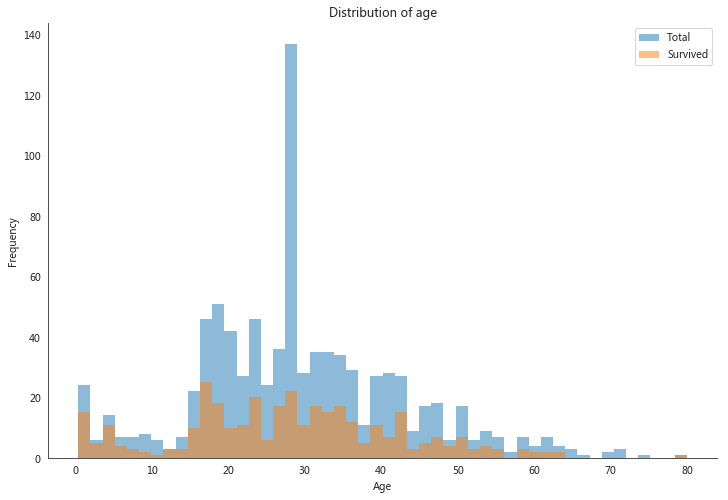

In [36]:
fig, ax = plt.subplots(figsize=(12,8))

ax.hist(titanic_clean[:891].Age,edgecolor='None',alpha=.5,bins=50, label='Total')
ax.hist(titanic_clean.loc[titanic_clean['Survived']==1,'Age'],edgecolor='None',alpha=.5,bins=50,label='Survived')
ax.set(title='Distribution of age',ylabel='Frequency',xlabel='Age')
plt.legend(loc='best');


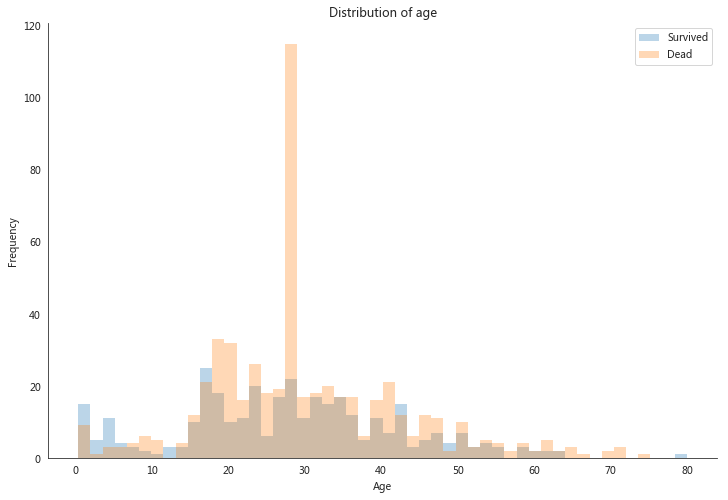

In [37]:
agehist=pd.concat([titanic_clean.loc[titanic_clean.Survived==1,'Age'],\
                   titanic_clean.loc[titanic_clean.Survived==0,'Age']],axis=1)
agehist.columns=['Survived','Dead']
ax=agehist.plot(kind='hist',bins=50,figsize=(12,8),alpha=0.3,edgecolor='none')
ax.set(title='Distribution of age',ylabel='Frequency',xlabel='Age');

In [38]:
def bar_show(keyname):
    fig,ax=plt.subplots()
    sns.barplot(x=keyname,y='Survived',data=titanic_clean[:891],color='steelblue')

/Users/mabelfan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


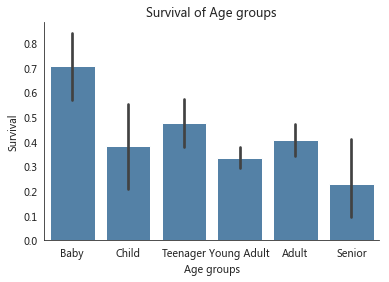

In [39]:
bar_show('age_cut')
plt.title('Survival of Age groups')
plt.xlabel('Age groups')
plt.ylabel('Survival')
plt.show();

相比于其他年龄段人员，5岁以下的婴幼儿的生还率最高,其次是青少年，长者的生还率最低。

In [40]:
import warnings
warnings.filterwarnings('ignore')

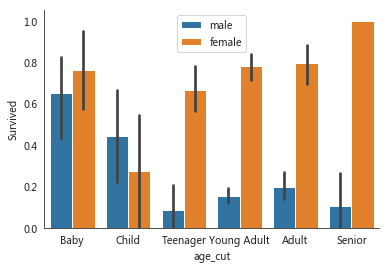

In [41]:
sns.barplot(x='age_cut',y='Survived',hue='Sex',data=titanic_clean[:891])
plt.legend();

不同年龄段的生还率，性别差异明显，除Child是男性生还率高于女性外，其他均为女性的生还率更高。

### 问题二  
不同性别的生还率是多少？生还人员中性别比例状况？

In [42]:
titanic_clean.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

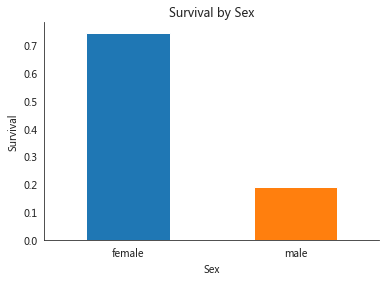

In [43]:
titanic_clean.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title('Survival by Sex')
plt.xticks(rotation=0)
plt.ylabel('Survival');

基于测试数据集，女性生还率高达74%，远高于男性的19%。

In [44]:
#计算不同性别是否生还的比例
def get_survival(x1,x2):
    survived_sex = titanic_clean.loc[(titanic_clean.Survived==x1) & (titanic_clean.Sex==x2),'Survived'].count()
    return survived_sex / titanic_train.Sex.count()

vals = np.array([[get_survival(1,'female'),get_survival(1,'male')],[get_survival(0,'female'),get_survival(0,'male')]])
vals

array([[0.26150393, 0.12233446],
       [0.09090909, 0.52525253]])

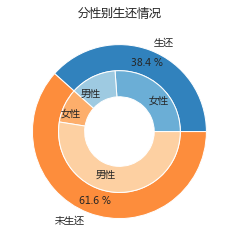

In [45]:
fig, ax = plt.subplots()

size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.array([0, 5]))
inner_colors = cmap(np.array([1, 2, 6, 7]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors, labels=['生还','未生还'],rotatelabels=0,
       autopct='% 3.1f %%', pctdistance=0.85, wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors, labels=['女性','男性','女性','男性'],labeldistance=0.7,\
      wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title="分性别生还情况")

plt.show();

从如上饼图可看出，基于现有的数据集，整体生还率为38.4%，生还女性占总体的26.2%，高于男性, 未生还的男性占总体的53%。

### 问题三  
哪个舱位的人员生还率最高？

In [46]:
titanic_clean.pivot_table('Survived',index='Pclass',margins=True)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363
All,0.383838


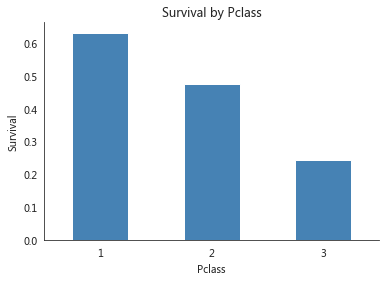

In [47]:
titanic_clean.groupby('Pclass')['Survived'].mean().plot(kind='bar',color='steelblue')
plt.title('Survival by Pclass')
plt.xticks(rotation=0)
plt.ylabel('Survival');

如预期所料，**一等舱的生还最高**，为63%，生还率顺序为一等舱>二等舱>三等舱。

** Sex & Pclass **

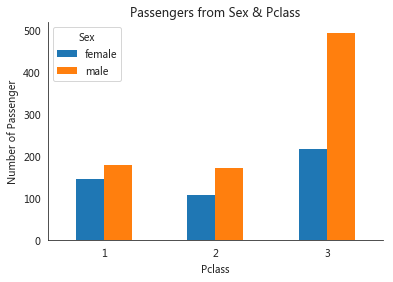

In [48]:
f,ax = plt.subplots()
f.set_size_inches((6,4))
titanic_clean.groupby(['Pclass','Sex'])['PassengerId'].count().unstack().plot(kind='bar',ax = ax,edgecolor='none')
ax.set_title('Passengers from Sex & Pclass')
ax.set_ylabel('Number of Passenger')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show();

从整体来看，各类舱位均是男性乘客较多，特别是三等舱，男性乘客是女性的2倍多。  
因男性的生还率远低于女性，这对于不同舱位的生还率存在较大的影响。

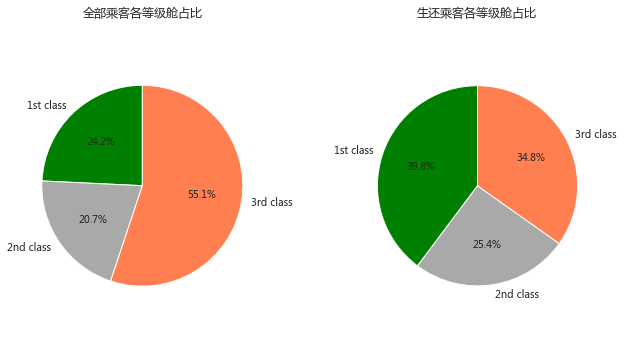

In [49]:
labels = '1st class','2nd class','3rd class'
titanic_tr_survived = titanic_clean.loc[titanic_clean.Survived == 1,:]
datas = [titanic_clean[:891],titanic_tr_survived]

fig, axes = plt.subplots(1,2,figsize=(10,6))
for i,data in enumerate(datas):
    axes[i].pie(data.groupby('Pclass')['Survived'].count()/data.Survived.count(),
                labels=labels, autopct='%1.1f%%',colors=['Green','darkgray','coral'],
                shadow=False, startangle=90,wedgeprops=dict(edgecolor='w'))
    axes[i].axis('equal')

axes[0].set_title('全部乘客各等级舱占比')
axes[1].set_title('生还乘客各等级舱占比')
plt.subplots_adjust(wspace = 0.5)

从生还人员所来自的舱位来看，一等舱人员占比最高，约为40%，而乘客数量占比超过半数的三等舱人员在生还人员中仅占约三分之一，二等舱人数占比最少，生还人员中占比稍有提高。

In [50]:
titanic_clean.groupby(['Pclass','Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

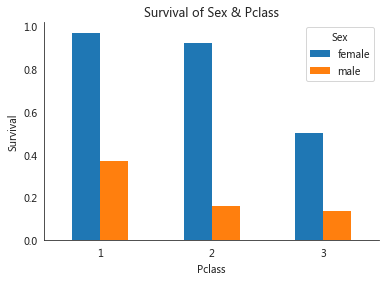

In [51]:
fig, ax = plt.subplots()
titanic_clean.groupby(['Pclass','Sex'])['Survived'].mean().unstack().plot(kind='bar',ax = ax,edgecolor='none')
ax.set_title('Survival of Sex & Pclass')
ax.set_ylabel('Survival')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

一等舱和二等舱的女性生还率均较高，超过90%，而三等舱的女性生还率却骤减，仅约50%；  
男性仅一等舱的生还率相对较高，但会低于三等舱女性的生还率，二等舱和三等舱的男性生还率取低，且相差不大。

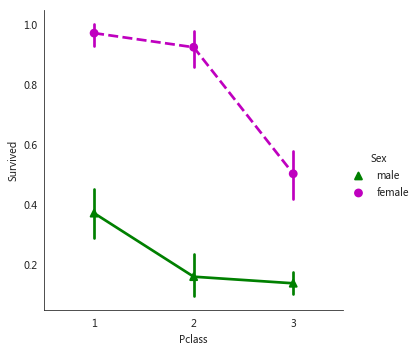

In [52]:
sns.catplot(x=("Pclass"), y=("Survived"), hue=("Sex"), kind="point",\
             palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],data=titanic_clean);

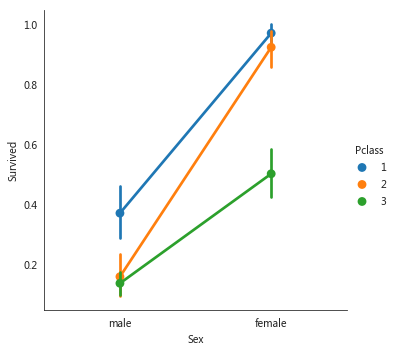

In [53]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data=titanic_clean);

### 问题四  
其他因素对生还率的影响？  
前面已经探讨过年龄，性别，舱位等三种情况，下面对其他情况，包括Parch, SlibSp, Title, Emabrked, Cabin等进行探索性分析。  
<br>
**Parch**

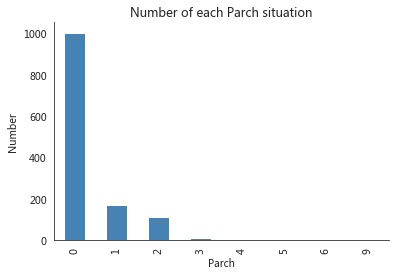

In [54]:
num_Parch = titanic_clean.groupby('Parch')['PassengerId'].count()
ax=num_Parch.plot(kind='bar',color='steelblue')
ax.set(title="Number of each Parch situation",xlabel='Parch',ylabel='Number');

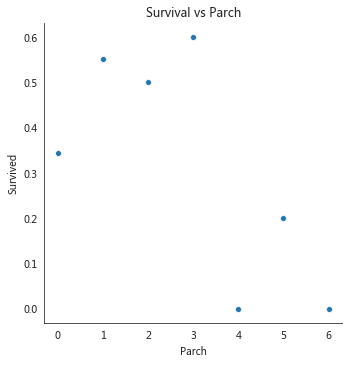

In [55]:
Survival_Parch = titanic_clean.groupby('Parch')['Survived'].mean().reset_index()

ax = sns.relplot(x='Parch',y='Survived',data=Survival_Parch)
ax.set(title="Survival vs Parch");

绝大多数人没有双亲或小孩陪同出行，部分人有1－2个双亲或小孩陪同，而陪同超过2个人的情况非常少。  
虽然有3个陪同的生还率最高，但因为样本仅有5个人，且标准差较大，不足以作出有3个双亲或小孩陪同的人生还率就很高的推论；   
而有1－2个陪同的生还率较高，可能原因是小孩优先存活，同时需要有双亲陪同。

**SibSp**

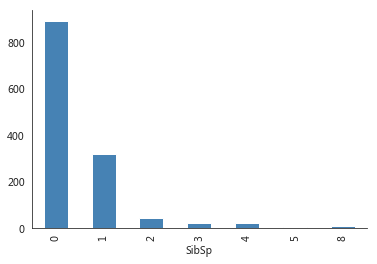

In [56]:
num_SibSp = titanic_clean.groupby('SibSp')['PassengerId'].count()
num_SibSp.plot(kind='bar',color='steelblue');

与Parch情况类似，没有兄弟姐妹或配偶陪同出行的人员占绝大多数，其次是有1人陪同的情况，多位兄弟姐妹或配偶出行的情况较少。

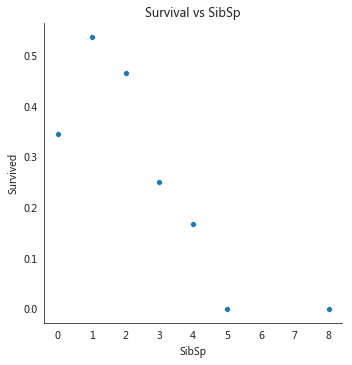

In [57]:
Survival_SibSp = titanic_clean.groupby('SibSp')['Survived'].mean().reset_index()

ax = sns.relplot(x='SibSp',y='Survived',data=Survival_SibSp)
ax.set(title="Survival vs SibSp");

有1位兄弟姐妹或配偶陪同出行的生还率最高，其次是有2位陪同，但因2位陪同的情况样本数少，可靠性更低;  
没有兄弟姐妹或配偶陪同出行的生还率居第三，高于3位及以上陪同的情况。

In [58]:
pd.pivot_table(titanic_clean,index=['Parch'],columns=['SibSp'], values=['Survived'])

Survived                                                  
SibSp         0         1         2         3         4    5    8
Parch                                                            
0      0.303538  0.520325  0.250000  1.000000       NaN  NaN  NaN
1      0.657895  0.596491  0.857143  0.000000  0.000000  NaN  NaN
2      0.724138  0.631579  0.500000  0.285714  0.333333  0.0  0.0
3      1.000000  0.333333  1.000000       NaN       NaN  NaN  NaN
4      0.000000  0.000000       NaN       NaN       NaN  NaN  NaN
5      0.000000  0.333333       NaN       NaN       NaN  NaN  NaN
6           NaN  0.000000       NaN       NaN       NaN  NaN  NaN

In [59]:
pd.crosstab(titanic_clean.loc[titanic_clean.Survived.notnull(),'Parch'], \
            titanic_clean.loc[titanic_clean.Survived.notnull(),'SibSp'])

SibSp,0,1,2,3,4,5,8
Parch,,,,,,,
0,537,123,16,2,0,0,0
1,38,57,7,7,9,0,0
2,29,19,4,7,9,5,7
3,1,3,1,0,0,0,0
4,1,3,0,0,0,0,0
5,2,3,0,0,0,0,0
6,0,1,0,0,0,0,0


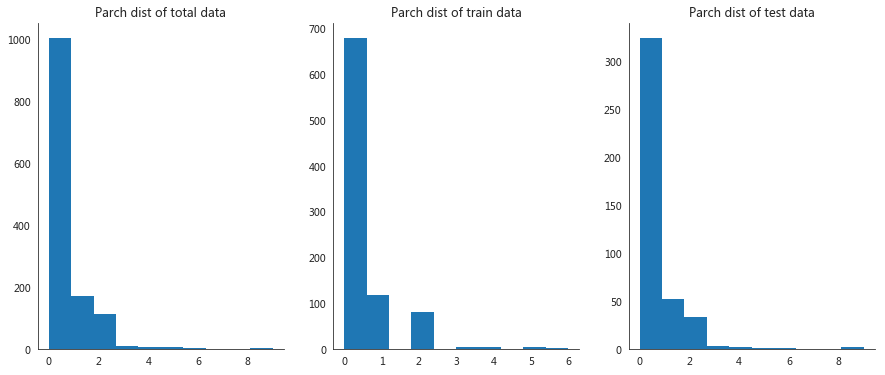

In [60]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.hist(titanic_clean.Parch, bins=10, edgecolor="None")
plt.title('Parch dist of total data')

plt.subplot(1,3,2)
plt.hist(titanic_clean.loc[titanic_clean.Survived.notnull(),'Parch'],bins=10, edgecolor="None")
plt.title('Parch dist of train data')

plt.subplot(1,3,3)
plt.hist(titanic_clean.loc[titanic_clean.Survived.isnull(),'Parch'], bins=10,edgecolor="None")
plt.title('Parch dist of test data')
plt.show()

**Title**

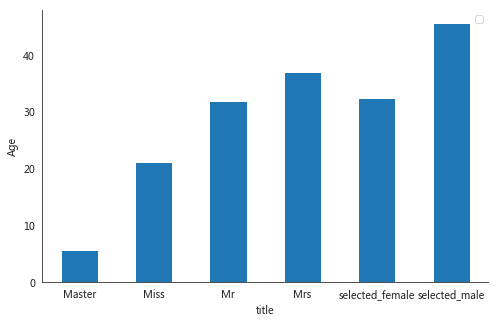

In [61]:
titanic_clean.groupby(['title'])[['Age','title']].mean().plot(kind='bar',figsize=(8,5))
plt.legend('')
plt.ylabel('Age')
plt.xticks(rotation=0)
plt.show()

年龄分布相对title较为合理。

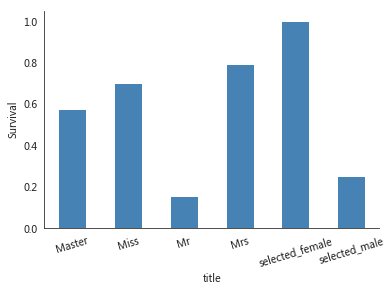

In [62]:
titanic_clean.groupby('title')['Survived'].mean().plot(kind='bar',color='steelblue')
plt.ylabel('Survival')
plt.xticks(rotation=17);

不同title的生还率差异明显，整体均为男性较低，而有特殊title的部分比同性别的普通人士的生还率稍高些。

**Embarked**

In [63]:
Survived_Embarked = pd.concat([titanic_clean[:891].groupby('Embarked')['Survived'].count(),
                               titanic_clean.groupby('Embarked')['Survived'].sum(),
                               titanic_clean.groupby('Embarked')['Survived'].mean()],axis=1).reset_index()
Survived_Embarked.columns=['Embarked','Total','Survived','Survival']
Survived_Embarked

,Embarked,Total,Survived,Survival
0,C,168,93.0,0.553571
1,Q,77,30.0,0.389610
2,S,646,219.0,0.339009


<Figure size 432x360 with 0 Axes>

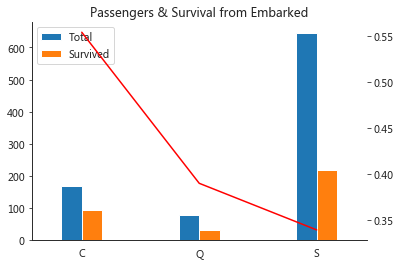

In [64]:
fig = plt.figure(figsize=(6,5))
ind = np.arange(3)
width = 0.35

Survived_Embarked[['Total','Survived']].plot(kind='bar',width=width)
Survived_Embarked['Survival'].plot(secondary_y=True,color='r')
plt.title('Passengers & Survival from Embarked')
plt.xticks(ind, ('C', 'Q', 'S'))

plt.show();

S港登船的人数最多，远超过S，Q登船的人数；  
而S港登船的生还率是最低的，C港登船的生还率最高。  

**Embarked & Pclass**

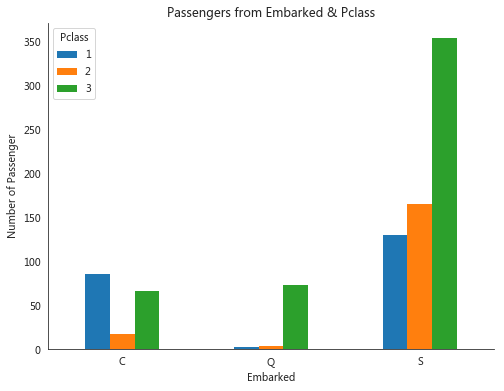

In [65]:
fig,ax = plt.subplots(figsize=(8,6))
#fig.set_size_inches((8,6))
titanic_clean[:891].groupby(['Embarked','Pclass'])['PassengerId'].count().unstack().plot(kind='bar',
                                                                                         ax = ax,edgecolor='none')
ax.set(xlabel='Embarked',ylabel='Number of Passenger',title='Passengers from Embarked & Pclass')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

在Southampton港登船的人数最多，而其中又以三等舱的人数占比最高，而三等舱的生还率较低，影响Southampton登船的生还率更低；  
在Cherbourg上船的一等舱人员占比最高，而一等舱的生还率最高，从而影响Cherbourg登船的生还率最高。
<br>

**Cabin**

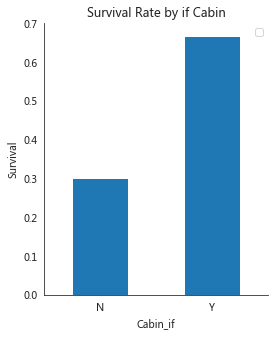

In [67]:
titanic_clean['Cabin_if'] = titanic_clean['Cabin_attr'].apply(lambda x:'N' if x=='U' else 'Y')

pd.pivot_table(titanic_clean,index=['Cabin_if'],values=['Survived']).plot.bar(figsize=(4,5))
plt.title('Survival Rate by if Cabin')
plt.ylabel('Survival')
plt.legend('')
plt.xticks([0,1],['N','Y'],rotation=0)
plt.show();

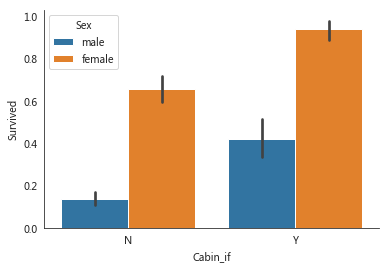

In [68]:
sns.barplot(x='Cabin_if',y='Survived',hue='Sex',data=titanic_clean);

从上图可知，有包厢号的生还率会远高于无包厢的情况。

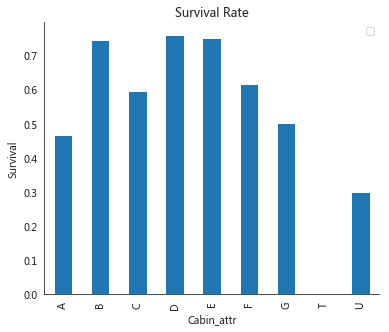

In [71]:
pd.pivot_table(titanic_clean,index=['Cabin_attr'],values=['Survived']).plot.bar(figsize=(6,5))
plt.ylabel('Survival')
plt.legend('')
plt.title('Survival Rate')
plt.show();

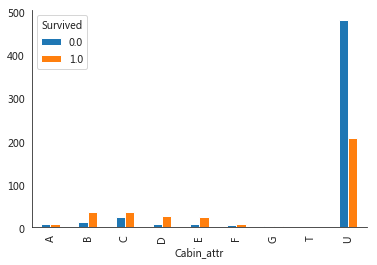

In [72]:
pd.crosstab(titanic_clean.Cabin_attr,titanic_clean.Survived).plot(kind='bar');

In [73]:
titanic_clean.loc[titanic_clean['Cabin'] != 'Unknown','Pclass'].unique()

array([1, 3, 2])

In [74]:
pd.crosstab(titanic_clean.Pclass, titanic_clean.Cabin_if,margins=True)

Cabin_if,N,Y,All
Pclass,,,
1,67,256,323
2,254,23,277
3,693,16,709
All,1014,295,1309


In [75]:
pd.crosstab(titanic_clean.Pclass, titanic_clean.Cabin_attr,margins=True)

Cabin_attr,A,B,C,D,E,F,G,T,U,All
Pclass,,,,,,,,,,
1,22,65,94,40,34,0,0,1,67,323
2,0,0,0,6,4,13,0,0,254,277
3,0,0,0,0,3,8,5,0,693,709
All,22,65,94,46,41,21,5,1,1014,1309


从上可知，一等舱只有小部分没有客舱号，而二等舱和三等舱只有少数有客舱号，另客舱号'C123'中的'C'说明的是甲板层，因此将以此作为一个特征。  
这里有两种方案可尝试，一是保留客舱号的首字母作为分类，即Cabin_attr，one_hot coding后容易造成过拟合;  
二是以是否有客舱号为分类，即Cabin_if，因为考虑到将空值的其他情况均占比较小。

In [76]:
titanic_clean[titanic_clean['Cabin_attr']=='T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_attr,title,age_cut,Cabin_if
339,340,0.0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,T,Mr,Adult,Y


T甲板的生还率为0,细究后惊奇地发现，仅有一名成年男性，且未生还。  
一等舱的生还率最高，所以除T客舱外，其他均要高于客舱号为空的情况。

# 生还预测

In [77]:
titanic_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_attr,title,age_cut,Cabin_if
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,U,Mr,Young Adult,N
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,Adult,Y
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,U,Miss,Young Adult,N
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,Young Adult,Y
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,U,Mr,Young Adult,N


### 特征工程  
  

In [82]:
titanic_feat = titanic_clean.copy()
titanic_feat['fsize'] = titanic_feat['Parch'].add(titanic_feat['SibSp'].values) + 1
titanic_feat[['fsize','Parch','SibSp']].sample(3)

,fsize,Parch,SibSp
757,1,0,0
595,3,1,1
427,1,0,0


In [79]:
titanic_feat.fsize.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: fsize, dtype: int64

In [83]:
titanic_feat.fsize = titanic_feat.fsize.apply(lambda x:3 if x>=3 else x)
titanic_feat.fsize.value_counts()

1    790
3    284
2    235
Name: fsize, dtype: int64

In [84]:
titanic_feat.groupby('fsize')['Survived'].mean()

fsize
1    0.303538
2    0.552795
3    0.466321
Name: Survived, dtype: float64

<Figure size 432x288 with 0 Axes>

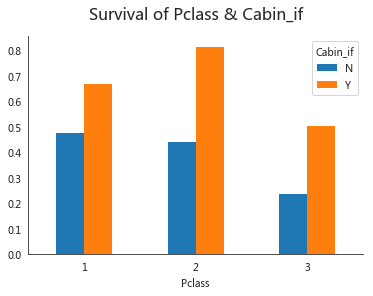

In [85]:
plt.figure()
titanic_feat.pivot_table('Survived',index='Pclass',columns='Cabin_if').plot(kind='bar',edgecolor='none')
plt.title('Survival of Pclass & Cabin_if',y=1.05, size=16)
plt.xticks(rotation=0)
plt.show();

对于无包厢号的，各等级舱的生还率与整体上各舱级的情况较为接近，而有包厢号的情况中，二等舱的生还率却是高于一等舱的。

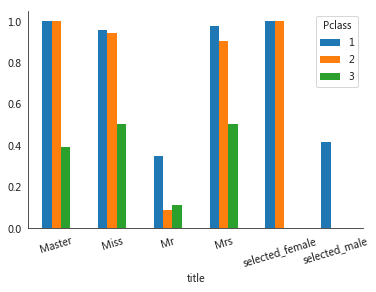

In [86]:
titanic_feat.pivot_table('Survived',index='title',columns='Pclass').plot(kind='bar',edgecolor='none')
plt.xticks(rotation=17);

对于女性和Master来说，一等舱和二等舱的生还率较为接近，均高于三等舱，而男性Mr和selected_male仅一等舱生还率稍高。

In [87]:
def comp_tp(x):
    if (titanic_feat.loc[x,'Pclass']!=3) and (titanic_feat.loc[x,'title']!="Mr" 
                                              or titanic_feat.loc[x,'title']!="selected_male"):
        return 1
    else:
        return 0

In [91]:
for i in range(len(titanic_feat)):
    titanic_feat.loc[i,'tp'] = comp_tp(i)

titanic_feat.tp.sum()

600.0

In [92]:
titanic_feat.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,323.0,87.508992,80.447178,0.0,30.6958,60.0000,107.6625,512.3292
2,277.0,21.179196,13.607122,0.0,13.0000,15.0458,26.0000,73.5000
3,709.0,13.295480,11.487932,0.0,7.7500,8.0500,15.2458,69.5500


In [93]:
titanic_feat.pivot_table('Fare',index='Pclass',columns='Cabin_attr',margins=True)

Cabin_attr,A,B,C,D,E,F,G,T,U,All
Pclass,,,,,,,,,,
1,41.244314,122.383078,107.926598,58.919065,63.464706,NaN,NaN,35.5,70.268157,87.508992
2,NaN,NaN,NaN,13.595833,11.587500,23.423077,NaN,NaN,21.394537,21.179196
3,NaN,NaN,NaN,NaN,11.000000,9.395838,14.205,NaN,13.343872,13.295480
All,41.244314,122.383078,107.926598,53.007339,54.564634,18.079367,14.205,35.5,19.121778,33.276193


In [95]:
titanic_feat.groupby(['Pclass','Cabin_if'])['Fare'].describe()

count       mean        std      min      25%       50%  \
Pclass Cabin_if                                                            
1      N          67.0  70.268157  80.114953   0.0000  26.5500  39.60000   
       Y         256.0  92.021241  80.077425   0.0000  37.7500  71.14165   
2      N         254.0  21.394537  13.843615   0.0000  13.0000  15.66460   
       Y          23.0  18.801087  10.604960  10.5000  12.6125  13.00000   
3      N         693.0  13.343872  11.595377   0.0000   7.7500   8.05000   
       Y          16.0  11.199481   4.643032   7.2292   7.6500   9.25625   

                       75%       max  
Pclass Cabin_if                       
1      N          79.20000  512.3292  
       Y         110.88330  512.3292  
2      N          26.00000   73.5000  
       Y          26.00000   39.0000  
3      N          15.24580   69.5500  
       Y          13.53125   22.3583

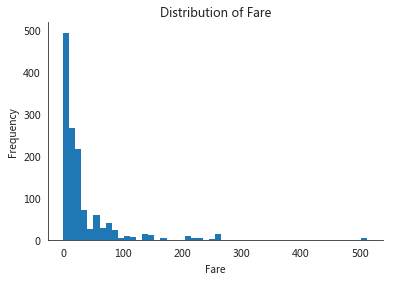

In [96]:
plt.hist(titanic_feat.Fare, bins=50, edgecolor="None")
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency");

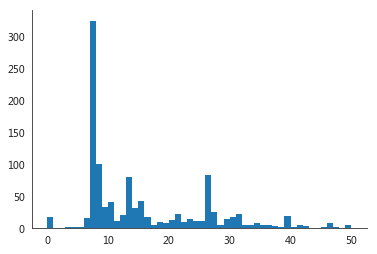

In [97]:
plt.hist(titanic_feat.loc[titanic_feat.Fare<=50,'Fare'], bins=50, edgecolor="None");

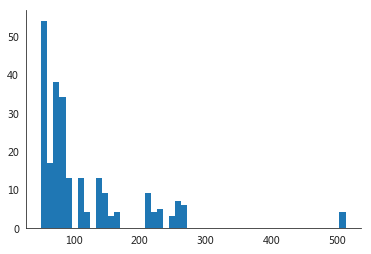

In [98]:
plt.hist(titanic_feat.loc[titanic_feat.Fare>50,'Fare'], bins=50, edgecolor="None");

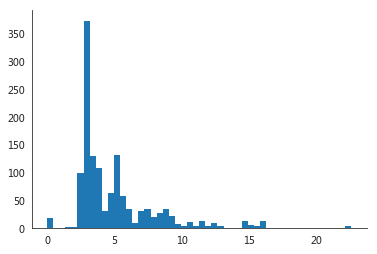

In [99]:
plt.hist(np.sqrt(titanic_feat.Fare), bins=50, edgecolor="None");

In [100]:
def cut_fare(x):
    if x < 10:
        return 1
    elif x < 40:
        return 2
    elif x < 50:
        return 3
    else:
        return 4

titanic_feat.loc[:,'fare_cut'] = titanic_feat.Fare.apply(cut_fare)

In [101]:
titanic_feat['fare_cut'].unique()

array([1, 4, 2, 3])

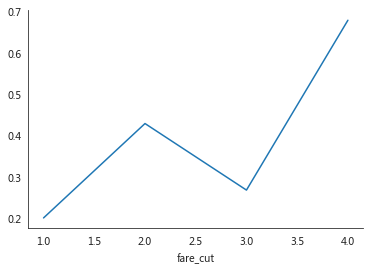

In [102]:
titanic_feat.groupby('fare_cut')['Survived'].mean().plot()

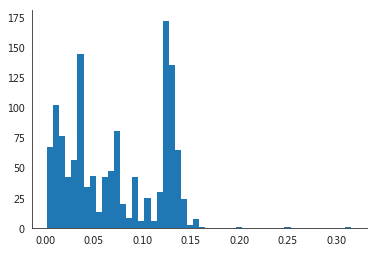

In [103]:
plt.hist((1/titanic_feat.loc[titanic_feat.Fare!=0,'Fare']), bins=50, edgecolor="None");

In [232]:
titanic_feat.pivot_table('Fare',index=['Pclass','Cabin_if'],margins=True)

Fare
Pclass Cabin_if           
1      N         70.268157
       Y         92.021241
2      N         21.394537
       Y         18.801087
3      N         13.343872
       Y         11.199481
All              33.276193

In [94]:
titanic_feat.pivot_table('Survived',index='Pclass',columns='Cabin_attr')

Cabin_attr,A,B,C,D,E,F,G,T,U
Pclass,,,,,,,,,
1,0.466667,0.744681,0.59322,0.758621,0.72,NaN,NaN,0.0,0.475000
2,NaN,NaN,NaN,0.750000,0.75,0.875,NaN,NaN,0.440476
3,NaN,NaN,NaN,NaN,1.00,0.200,0.5,NaN,0.235908


In [104]:
titanic_feat.pivot_table('Survived',index=['Pclass','Cabin_if'],margins=True)

Survived
Pclass Cabin_if          
1      N         0.475000
       Y         0.664773
2      N         0.440476
       Y         0.812500
3      N         0.235908
       Y         0.500000
All              0.383838

In [105]:
titanic_feat.pivot_table('Survived',index=['fare_cut','Pclass'])

Survived
fare_cut Pclass          
1        1       0.000000
         2       0.000000
         3       0.206790
2        1       0.500000
         2       0.494048
         3       0.319728
3        1       0.333333
         2       0.666667
         3       0.000000
4        1       0.728571
         2       0.285714
         3       0.357143

In [106]:
pd.crosstab(titanic_feat['fare_cut'], titanic_feat.Pclass)

Pclass,1,2,3
fare_cut,,,
1,8,7,477
2,94,254,205
3,10,4,8
4,211,12,19


In [107]:
def qtlineBar(data):
    data.plot(kind='bar', figsize=(12,8))
    plt.axhline(0.75,color='#BA55D3')
    plt.axhline(0.5,color='#BA55D3')
    plt.axhline(0.25,color='#BA55D3')

In [108]:
def matchVariate(col1,col2,col3,val,cal,data):
    v1 = np.unique(col1)
    v2 = np.unique(col2)
    v3 = np.unique(col3)
    for i in v1:
        for j in v2:
            for t in v3:
                if data.loc[(col1==i) & (col2==j) & (col3==t) & (val.notnull()),'Survived'].mean()>=0.75:
                    data.loc[(col1==i) & (col2==j) & (col3==t),cal] = 1
                elif data.loc[(col1==i) & (col2==j) & (col3==t) & (val.notnull()),'Survived'].mean()>=0.5:
                    data.loc[(col1==i) & (col2==j) & (col3==t),cal] = 2
                elif data.loc[(col1==i) & (col2==j) & (col3==t) & (val.notnull()),'Survived'].mean()>=0.25:
                    data.loc[(col1==i) & (col2==j) & (col3==t),cal] = 3
                elif data.loc[(col1==i) & (col2==j) & (col3==t) & (val.notnull()),'Survived'].mean()>=0:
                    data.loc[(col1==i) & (col2==j) & (col3==t),cal] = 4
                else:
                    data.loc[(col1==i) & (col2==j) & (col3==t),cal] = 5

In [109]:
titanic_feat.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_attr,title,age_cut,Cabin_if,fsize,tp,fare_cut
272,273,1.0,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.00000,0,1,250644,19.50,Unknown,S,U,Mrs,Adult,N,2,1.0,2
604,605,1.0,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.00000,0,0,111426,26.55,Unknown,C,U,Mr,Young Adult,N,1,1.0,2
993,994,NaN,3,"Foley, Mr. William",male,28.31891,0,0,365235,7.75,Unknown,Q,U,Mr,Young Adult,N,1,0.0,1


Text(25,0.28,'25% survival rate')

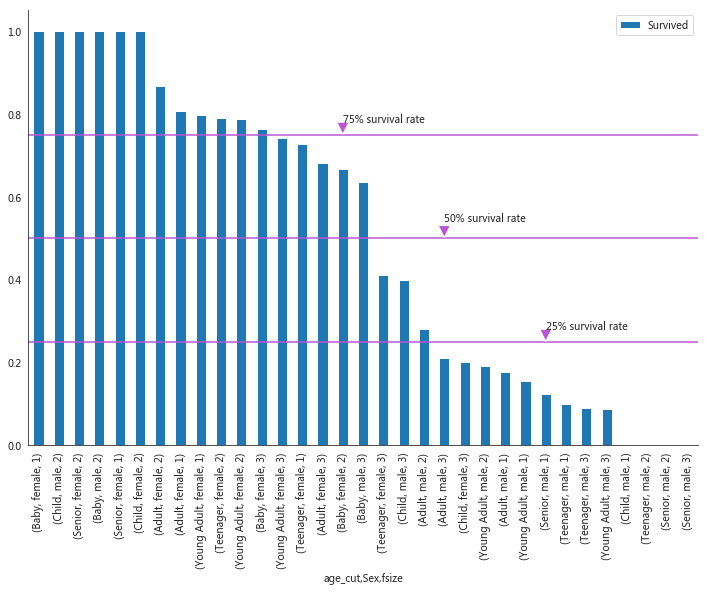

In [110]:
asf = titanic_feat.pivot_table('Survived',index=['age_cut','Sex','fsize']).sort_values('Survived',ascending=False)
qtlineBar(asf)
plt.annotate('75% survival rate',xy=(15,0.75),xytext=(15,0.78),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))
plt.annotate('50% survival rate',xy=(20,0.50),xytext=(20,0.54),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))
plt.annotate('25% survival rate',xy=(25,0.25),xytext=(25,0.28),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))

In [111]:
matchVariate(titanic_feat.age_cut,titanic_feat.Sex,titanic_feat.fsize,titanic_feat.Survived,'asf',titanic_feat)
titanic_feat.asf.unique()

array([4., 1., 2., 3., 5.])

In [112]:
titanic_feat.loc[titanic_feat.asf == 5,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_attr,title,age_cut,Cabin_if,fsize,tp,fare_cut,asf
1011,1012,NaN,2,"Watt, Miss. Bertha J",female,12.0,0,0,C.A. 33595,15.7500,Unknown,S,U,Miss,Child,N,1,1.0,2,5.0
1070,1071,NaN,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,C,E,Mrs,Senior,Y,3,1.0,4,5.0
1196,1197,NaN,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S,B,Mrs,Senior,Y,3,1.0,2,5.0


In [113]:
titanic_feat.loc[(titanic_feat.asf==5.)&(titanic_feat.age_cut=='Child'),'asf'] = 2
titanic_feat.loc[(titanic_feat.asf==5.)&(titanic_feat.age_cut=='Senior'),'asf'] = 1
titanic_feat.asf.unique()

array([4., 1., 2., 3.])

In [114]:
titanic_feat.pivot_table('Survived',index=['title','Pclass']).sort_values('Survived',ascending=False)

Survived
title           Pclass          
Master          1       1.000000
                2       1.000000
selected_female 1       1.000000
                2       1.000000
Mrs             1       0.976190
Miss            1       0.956522
                2       0.941176
Mrs             2       0.902439
Miss            3       0.500000
Mrs             3       0.500000
selected_male   1       0.416667
Master          3       0.392857
Mr              1       0.345794
                3       0.112853
                2       0.087912
selected_male   2       0.000000

Text(32,0.28,'25% survival rate')

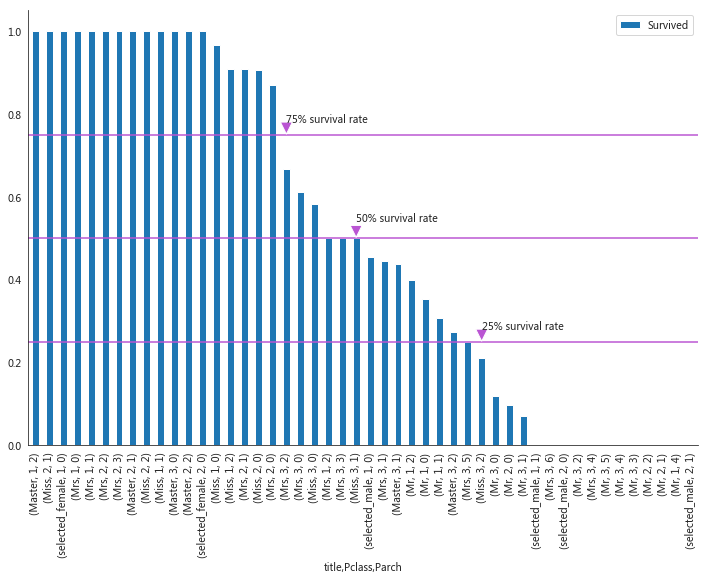

In [115]:
TPP = titanic_feat.pivot_table('Survived',index=['title','Pclass','Parch']).sort_values('Survived',ascending=False)
qtlineBar(TPP)
plt.annotate('75% survival rate',xy=(18,0.75),xytext=(18,0.78),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))
plt.annotate('50% survival rate',xy=(23,0.50),xytext=(23,0.54),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))
plt.annotate('25% survival rate',xy=(32,0.25),xytext=(32,0.28),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))

In [116]:
matchVariate(titanic_feat.title,titanic_feat.Pclass,titanic_feat.Parch,titanic_feat.Survived,'TPP',titanic_feat)
titanic_feat.TPP.unique()

array([4., 1., 2., 3., 5.])

In [117]:
titanic_feat.loc[titanic_feat.TPP == 5,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Cabin_attr,title,age_cut,Cabin_if,fsize,tp,fare_cut,asf,TPP
915,916,NaN,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.000000,1,3,PC 17608,262.375,...,C,B,Mrs,Adult,Y,3,1.0,4,2.0,5.0
960,961,NaN,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.000000,1,4,19950,263.000,...,S,C,Mrs,Adult,Y,3,1.0,4,2.0,5.0
979,980,NaN,3,"O'Donoghue, Ms. Bridget",female,21.885375,0,0,364856,7.750,...,Q,U,selected_female,Young Adult,N,1,0.0,1,1.0,5.0
1030,1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.000000,1,6,CA 2144,46.900,...,S,U,Mr,Adult,N,3,0.0,3,4.0,5.0
1033,1034,NaN,1,"Ryerson, Mr. Arthur Larned",male,61.000000,1,3,PC 17608,262.375,...,C,B,Mr,Senior,Y,3,1.0,4,4.0,5.0
1233,1234,NaN,3,"Sage, Mr. John George",male,28.318910,1,9,CA. 2343,69.550,...,S,U,Mr,Young Adult,N,3,0.0,4,4.0,5.0
1256,1257,NaN,3,"Sage, Mrs. John (Annie Bullen)",female,32.326531,1,9,CA. 2343,69.550,...,S,U,Mrs,Young Adult,N,3,0.0,4,2.0,5.0


In [118]:
titanic_feat.loc[(titanic_feat.TPP==5.)&(titanic_feat.Sex=='female'),'TPP'] = 1
titanic_feat.loc[(titanic_feat.TPP==5.)&(titanic_feat.Sex=='male'),'TPP'] = 4
titanic_feat.TPP.unique()

array([4., 1., 2., 3.])

In [119]:
titanic_feat.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_attr', 'title',
       'age_cut', 'Cabin_if', 'fsize', 'tp', 'fare_cut', 'asf', 'TPP'],
      dtype='object')

In [120]:
titanic_feat.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Cabin_attr,title,age_cut,Cabin_if,fsize,tp,fare_cut,asf,TPP
1260,1261,NaN,2,"Pallas y Castello, Mr. Emilio",male,29.000000,0,0,SC/PARIS 2147,13.8583,...,C,U,Mr,Young Adult,N,1,1.0,2,4.0,4.0
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,17.360874,0,0,335677,7.7500,...,Q,U,Miss,Teenager,N,1,0.0,1,2.0,2.0
1184,1185,NaN,1,"Dodge, Dr. Washington",male,53.000000,1,1,33638,81.8583,...,S,A,selected_male,Adult,Y,3,1.0,4,4.0,4.0


In [202]:
# choose the features for modeling
estcol1 = ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
           'Parch', 'Fare', 'Embarked', 'Cabin_attr','title', 'age_cut',
           'Cabin_if', 'fsize', 'tp','fare_cut','asf', 'TPP']

titanic_est1 = titanic_feat[estcol1].set_index(['PassengerId'])
# change Sex to int number
titanic_est1['Sex'] = (titanic_est1['Sex'] == 'male').astype('int')
# change Cabin_if to int number
titanic_est1['Cabin_if'] = (titanic_est1['Cabin_if'] == 'Y').astype('int')

# change Embarked to number, not correct, Embarked is a discrete feature.
#labels = titanic_est1['Embarked'].unique().tolist()
#titanic_est1['Embarked'] = titanic_est1['Embarked'].apply(lambda n: labels.index(n))

age_cut_dict = {'Baby':1,'Child':2,'Teenager':3,'Young Adult':4,'Adult':5,'Senior':6}
titanic_est1['age_cut'] = titanic_est1['age_cut'].map(age_cut_dict)

#title_dict = {'selected_female':1,'Mrs':2, 'Miss':3, 'Master':4, 'selected_male':5, 'Mr':6}
#titanic_est1['title'] = titanic_est1['title'].map(title_dict)

titanic_est1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_attr,title,age_cut,Cabin_if,fsize,tp,fare_cut,asf,TPP
PassengerId,,,,,,,,,,,,,,,,,
1,0.0,3,1,22.00000,1,0,7.2500,S,U,Mr,4,0,2,0.0,1,4.0,4.0
2,1.0,1,0,38.00000,1,0,71.2833,C,C,Mrs,5,1,2,1.0,4,1.0,1.0
3,1.0,3,0,26.00000,0,0,7.9250,S,U,Miss,4,0,1,0.0,1,1.0,2.0
4,1.0,1,0,35.00000,1,0,53.1000,S,C,Mrs,4,1,2,1.0,4,1.0,1.0
5,0.0,3,1,35.00000,0,0,8.0500,S,U,Mr,4,0,1,0.0,1,4.0,4.0
6,0.0,3,1,28.31891,0,0,8.4583,Q,U,Mr,4,0,1,0.0,1,4.0,4.0
7,0.0,1,1,54.00000,0,0,51.8625,S,E,Mr,5,1,1,1.0,4,4.0,3.0
8,0.0,3,1,2.00000,3,1,21.0750,S,U,Master,1,0,3,0.0,2,2.0,3.0
9,1.0,3,0,27.00000,0,2,11.1333,S,U,Mrs,4,0,3,0.0,2,2.0,2.0


In [122]:
X = titanic_est1.drop(['Survived'],axis=1)
# convert categorical variables to numerical variables
X_dummies=pd.get_dummies(X)

X1 = X_dummies[:891].values
X2 = X_dummies[891:].values
y1 = titanic_est1['Survived'][:891].values

print("train_data size: {0}\ntest_data size: {1}\ntrain_target size: {2}".format(X1.shape, X2.shape, y1.shape))

train_data size: (891, 31)
test_data size: (418, 31)
train_target size: (891,)


In [123]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit(X1).transform(X1)
X_test_scaled=scaler.transform(X2)

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler2=MinMaxScaler()
X_scaled_mm=scaler2.fit(X1).transform(X1)
X_test_scaled_mm=scaler2.transform(X2)

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [126]:
models=[KNeighborsClassifier(),LogisticRegression(penalty='l2',solver='newton-cg'),GaussianNB(),
        DecisionTreeClassifier(),RandomForestClassifier(n_estimators=10), GradientBoostingClassifier(),
        SVC(gamma='auto')]

# evaluate models by using cross-validation
names=['KNN','LR','NB','Tree','RF','GDBT','SVM']
for name, model in zip(names,models):
    score=cross_val_score(model,X1,y1,cv=5)
    print("{}:{},{}".format(name,score.mean(),score))

KNN:0.7509355848509125,[0.72067039 0.72067039 0.76966292 0.76966292 0.7740113 ]
LR:0.8317415109722827,[0.81005587 0.81005587 0.83146067 0.83707865 0.8700565 ]
NB:0.7857742446503939,[0.74860335 0.75977654 0.78651685 0.78651685 0.84745763]
Tree:0.793557456644775,[0.75977654 0.79329609 0.81460674 0.78089888 0.81920904]
RF:0.8103864228042756,[0.78212291 0.80446927 0.85393258 0.78089888 0.83050847]
GDBT:0.8238383253770586,[0.82122905 0.80446927 0.83707865 0.81460674 0.84180791]
SVM:0.758801178954297,[0.72067039 0.75418994 0.76966292 0.74157303 0.8079096 ]


In [127]:
# used scaled data
names=['KNN','LR','NB','Tree','RF','GDBT','SVM']
for name, model in zip(names,models):
    kfold = KFold(n_splits=5)
    score=cross_val_score(model,X_scaled,y1,cv=kfold)
    print("{}:{},{}".format(name,score.mean(),score))

KNN:0.8226790534178645,[0.81564246 0.79775281 0.8258427  0.81460674 0.85955056]
LR:0.8260498399347185,[0.81564246 0.80337079 0.80337079 0.8258427  0.88202247]
NB:0.775563367020275,[0.74860335 0.71910112 0.78089888 0.78651685 0.84269663]
Tree:0.7811562362689097,[0.77094972 0.78651685 0.79775281 0.76966292 0.78089888]
RF:0.8058439520431862,[0.79888268 0.79775281 0.84831461 0.76966292 0.81460674]
GDBT:0.8170547988199107,[0.82122905 0.78651685 0.82022472 0.79775281 0.85955056]
SVM:0.8338899001945892,[0.83798883 0.80898876 0.8258427  0.79775281 0.8988764 ]


In [128]:
# used MinMaxscaled data
names=['KNN','LR','NB','Tree','RF','GDBT','SVM']
for name, model in zip(names,models):
    kfold = KFold(n_splits=5)
    score=cross_val_score(model,X_scaled_mm,y1,cv=kfold)
    print("{}:{},{}".format(name,score.mean(),score))

KNN:0.8058690603226415,[0.77653631 0.78089888 0.82022472 0.81460674 0.83707865]
LR:0.8182097796748478,[0.79329609 0.80337079 0.82022472 0.80898876 0.86516854]
NB:0.7688594564057498,[0.7150838  0.71910112 0.78089888 0.78651685 0.84269663]
Tree:0.7834034272801456,[0.77094972 0.79213483 0.79775281 0.76966292 0.78651685]
RF:0.8058376749733224,[0.80446927 0.7752809  0.84269663 0.78651685 0.82022472]
GDBT:0.8170547988199107,[0.82122905 0.78651685 0.82022472 0.79775281 0.85955056]
SVM:0.8136777352331933,[0.82681564 0.81460674 0.80337079 0.76404494 0.85955056]


'k-Nearest Neighbors', 'Support Vector Machine' perform much better on scaled data.  
There's no big difference between StandardScaler and MinMaxScaler.  

In [129]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
pca.fit(X_scaled)
print(sum(pca.explained_variance_ratio_))

0.9114390275841374


In [130]:
model=GradientBoostingClassifier()
model.fit(X1,y1)
fi=pd.DataFrame({'importance':model.feature_importances_},index=X_dummies.columns)
fi.sort_values('importance',ascending=False)

,importance
TPP,0.641011
Fare,0.106132
Age,0.087180
asf,0.072442
SibSp,0.035976
Embarked_S,0.015518
Cabin_attr_E,0.013782
Cabin_if,0.008930
age_cut,0.002990
title_Master,0.002059


In [131]:
from sklearn.feature_selection import SelectKBest,chi2

selector = SelectKBest(k=3)  #默认为F值检验算法
X_new = selector.fit_transform(X1, y1)
X_new[:5]

array([[4., 4., 1.],
       [1., 1., 0.],
       [1., 2., 0.],
       [1., 1., 0.],
       [4., 4., 1.]])

特征相关性最大的前三个分别是：asf, TPP, sex.

In [133]:
selector = SelectKBest(chi2,k=2)
X_new = selector.fit_transform(X1, y1)
X_new[:5]

array([[ 7.25  ,  4.    ],
       [71.2833,  1.    ],
       [ 7.925 ,  2.    ],
       [53.1   ,  1.    ],
       [ 8.05  ,  4.    ]])

相关性最大的两个特征是Fare, TPP.  

In [134]:
from sklearn.feature_selection import RFE
#递归特征消除法，返回特征选择后的数据

data_rfe = RFE(estimator=LogisticRegression(solver='newton-cg', penalty='l2'),
               n_features_to_select=2).fit_transform(X1, y1)
data_rfe[:5]   #选择的是TPP和Parch

array([[4., 0.],
       [1., 0.],
       [2., 0.],
       [1., 0.],
       [4., 0.]])

In [135]:
from sklearn.feature_selection import SelectFromModel

#带L1惩罚项的逻辑回归作为基模型的特征选择
data_sfm = SelectFromModel(LogisticRegression(penalty="l1", C=0.1,solver='liblinear')).fit_transform(X1, y1)
data_sfm[:5]

array([[ 3.    , 22.    ,  1.    ,  7.25  ,  0.    ,  2.    ,  0.    ,
         1.    ,  4.    ,  4.    ],
       [ 1.    , 38.    ,  1.    , 71.2833,  1.    ,  2.    ,  1.    ,
         4.    ,  1.    ,  1.    ],
       [ 3.    , 26.    ,  0.    ,  7.925 ,  0.    ,  1.    ,  0.    ,
         1.    ,  1.    ,  2.    ],
       [ 1.    , 35.    ,  1.    , 53.1   ,  1.    ,  2.    ,  1.    ,
         4.    ,  1.    ,  1.    ],
       [ 3.    , 35.    ,  0.    ,  8.05  ,  0.    ,  1.    ,  0.    ,
         1.    ,  4.    ,  4.    ]])

In [399]:
from scipy.stats import pearsonr

SelectKBest(lambda X, Y: tuple(map(tuple,np.array(list(map(lambda x:pearsonr(x, Y), X.T))).T)), \
            k=5).fit_transform(X1, y1)[:10]

array([[0., 0., 1., 0., 0.],
       [1., 1., 4., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 1., 4., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 1., 4., 0., 0.],
       [0., 0., 2., 0., 0.],
       [0., 0., 2., 0., 1.],
       [0., 1., 2., 0., 1.]])

In [401]:
SelectKBest(lambda X, Y: list(np.array([pearsonr(x, Y) for x in X.T]).T), k=5).fit_transform(X1, y1)[:10]

array([[0., 0., 1., 0., 0.],
       [1., 1., 4., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 1., 4., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 1., 4., 0., 0.],
       [0., 0., 2., 0., 0.],
       [0., 0., 2., 0., 1.],
       [0., 1., 2., 0., 1.]])

$r_{pb} = \frac{\sum (x - m_x) (y - m_y)
                   }{\sqrt{\sum (x - m_x)^2 (y - m_y)^2}}$

In [136]:
def mis_idx(n_splits=None):
    rr = []
    model = GradientBoostingClassifier()
    kf = KFold(n_splits=n_splits)
    for train, test in kf.split(X1, y1):
        model.fit(X1[train], y1[train])
        pred = model.predict(X1[test])
        idx = pd.Series(y1)[test][pred != y1[test]].index.values
        rr.append(idx)
    return rr

rr = mis_idx(10)

In [137]:
full_index = np.concatenate(rr)
print('misclassified indeces: {0}\n total amount: {1}'.format(full_index,len(full_index)))

misclassified indeces: [  2   8  10  11  14  17  18  21  23  25  36  38  41  49  55  68  74  79
  81  85 102 107 111 114 118 127 137 139 140 141 142 146 165 174 177 184
 187 192 199 204 205 207 209 220 224 226 233 235 240 245 246 248 251 261
 264 267 271 279 283 286 288 292 297 298 301 312 328 330 338 347 357 373
 391 394 396 400 414 415 430 434 444 447 449 453 455 460 479 483 484 489
 498 501 502 505 507 509 510 543 547 550 553 554 564 569 570 578 579 587
 599 604 607 617 622 630 632 643 645 647 649 654 657 660 664 671 673 677
 680 692 698 712 729 740 741 744 748 762 767 772 782 786 797 804 807 816
 821 828 839 852 854 855 857]
 total amount: 151


In [138]:
errPred = titanic_est1.iloc[full_index,:]
errPred.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,age_cut,Cabin_if,fsize,tp,fare_cut,asf,TPP
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,0.655629,2.291391,0.582781,29.516635,0.443709,0.291391,29.073123,3.953642,0.304636,1.609272,0.403974,2.019868,2.887417,2.887417
std,0.476744,0.906196,0.494741,13.408082,0.771455,0.698469,35.268380,0.982091,0.461785,0.799779,0.492325,1.048619,1.267770,0.913185
min,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,7.987500,4.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000
50%,1.000000,3.000000,1.000000,28.318910,0.000000,0.000000,15.500000,4.000000,0.000000,1.000000,0.000000,2.000000,4.000000,3.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,30.500000,5.000000,1.000000,2.000000,1.000000,2.000000,4.000000,4.000000
max,1.000000,3.000000,1.000000,80.000000,4.000000,5.000000,247.520800,6.000000,1.000000,3.000000,1.000000,4.000000,4.000000,4.000000


In [139]:
errPred.loc[errPred.Survived==1,:].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,age_cut,Cabin_if,fsize,tp,fare_cut,asf,TPP
count,99.0,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,1.0,2.333333,0.737374,30.958252,0.414141,0.30303,24.460775,4.040404,0.262626,1.545455,0.373737,1.898990,3.252525,3.252525
std,0.0,0.903508,0.442301,13.839329,0.857263,0.76204,24.375595,0.999175,0.442301,0.811558,0.486257,0.974103,1.145919,0.786927
min,1.0,1.000000,0.000000,2.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,1.0,1.000000,0.000000,22.500000,0.000000,0.00000,7.925000,4.000000,0.000000,1.000000,0.000000,1.000000,2.500000,3.000000
50%,1.0,3.000000,1.000000,29.000000,0.000000,0.00000,15.850000,4.000000,0.000000,1.000000,0.000000,2.000000,4.000000,3.000000
75%,1.0,3.000000,1.000000,38.500000,1.000000,0.00000,30.250000,5.000000,1.000000,2.000000,1.000000,2.000000,4.000000,4.000000
max,1.0,3.000000,1.000000,80.000000,4.000000,5.00000,133.650000,6.000000,1.000000,3.000000,1.000000,4.000000,4.000000,4.000000


In [140]:
errPred.describe(include=['O'])

,Embarked,Cabin_attr,title
count,151,151,151
unique,3,7,5
top,S,U,Mr
freq,107,105,79


In [141]:
# both mean and count of 'survived' should be considered.
errPred.groupby(['title'])['Survived'].agg([('average','mean'),('number','count')])

,average,number
title,,
Master,1.000000,3
Miss,0.384615,39
Mr,0.822785,79
Mrs,0.458333,24
selected_male,0.833333,6


In [142]:
errPred.groupby(['title','Pclass'])['Survived'].agg([('average','mean'),('number','count')])

average  number
title         Pclass                  
Master        3       1.000000       3
Miss          1       0.333333       3
              2       0.000000       2
              3       0.411765      34
Mr            1       0.638889      36
              2       0.888889       9
              3       1.000000      34
Mrs           1       0.000000       1
              2       0.000000       4
              3       0.578947      19
selected_male 1       0.833333       6

In [143]:
errPred.groupby(['title','Pclass','Parch','SibSp'])['Survived'].agg([('average','mean'),('number','count')])

average  number
title         Pclass Parch SibSp                  
Master        3      1     1      1.000000       1
                     2     0      1.000000       1
                           4      1.000000       1
Miss          1      0     0      0.500000       2
                     2     1      0.000000       1
              2      0     0      0.000000       2
              3      0     0      0.333333      21
                           1      0.250000       4
                           2      0.500000       2
                     1     0      0.500000       2
                           1      0.500000       2
                     2     0      1.000000       1
                           4      1.000000       2
Mr            1      0     0      0.789474      19
                           1      0.454545      11
                     1     0      0.000000       2
                           1      0.666667       3
                     2     0      1.000000       1
              2      0     0      0.875000       8
                           1      1.000000       1
              3      0     0      1.000000      30
                           1      1.000000       2
                           2      1.000000       1
                     1     1      1.000000       1
Mrs           1      2     1      0.000000       1
              2      0     0      0.000000       1
                           1      0.000000       2
                     1     1      0.000000       1
              3      0     0      0.666667       3
                           1      0.333333       6
                           3      1.000000       1
                     1     0      1.000000       1
                           1      0.500000       4
                     2     0      0.666667       3
                     5     1      1.000000       1
selected_male 1      0     0      1.000000       3
                           1      1.000000       1
                           2      0.500000       2

'Mr','Pclass 1','Parch 0','SibSp 0', 19  
'Mr','Pclass 1','Parch 0','SibSp 1', 11  
'Mr','Pclass 3'|'Pclass 2','Parch 0','SibSp 0', 30+8  
'Miss','Pclass 3','Parch 0','SibSp 0', 20  

In [204]:
titanic_est1.loc[(titanic_est1.title=='Mr')&(titanic_est1.Pclass==1)&(titanic_est1.Parch==0)&(titanic_est1.SibSp==0),'MPPS']=2
titanic_est1.loc[(titanic_est1.title=='Mr')&((titanic_est1.Pclass==3)|(titanic_est1.Pclass==2))&(titanic_est1.Parch==0)&(titanic_est1.SibSp==0),'MPPS']=1
titanic_est1.loc[(titanic_est1.title=='Miss')&(titanic_est1.Pclass==3)&(titanic_est1.Parch==0)&(titanic_est1.SibSp==0),'MPPS']=4
titanic_est1.loc[(titanic_est1.title=='Mr')&(titanic_est1.Pclass==1)&(titanic_est1.Parch==0)&(titanic_est1.SibSp==1),'MPPS']=4
titanic_est1.MPPS.fillna(3,inplace=True)
titanic_est1.MPPS.value_counts()

3.0    608
1.0    480
4.0    122
2.0     99
Name: MPPS, dtype: int64

In [205]:
titanic_rel = titanic_est1
# change Embarked to number
labels = titanic_rel['Embarked'].unique().tolist()
titanic_rel['Embarked'] = titanic_rel['Embarked'].apply(lambda n: labels.index(n))

title_dict = {'selected_female':1,'Mrs':2, 'Miss':3, 'Master':4, 'selected_male':5, 'Mr':6}
titanic_rel['title'] = titanic_rel['title'].map(title_dict)

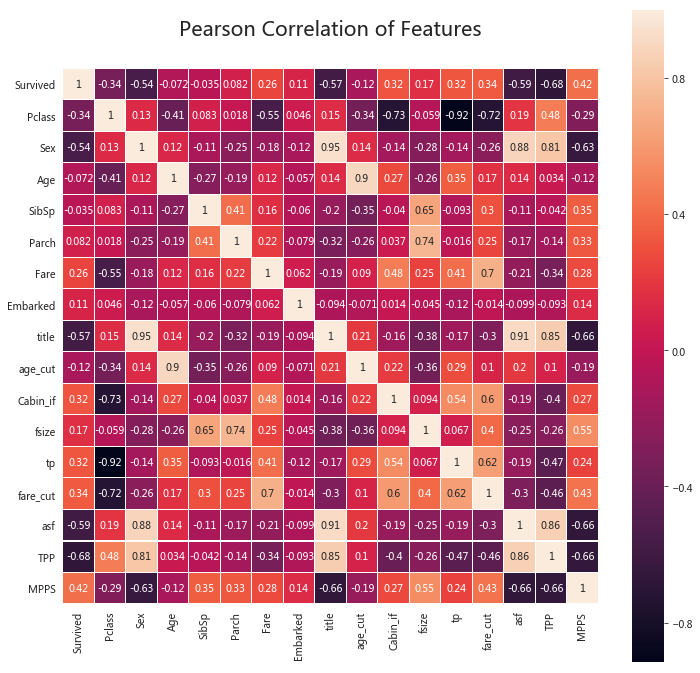

In [206]:
fig, ax = plt.subplots(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap((titanic_rel[:891]).corr(),annot=True,square=True,linewidths=0.1,vmax=1.0);

#### Rechoose and scale the data

In [207]:
X = titanic_est1.drop(['Survived'],axis=1)
# convert categorical variables to numerical variables
X_dummies=pd.get_dummies(X)

X1 = X_dummies[:891].values
X2 = X_dummies[891:].values
y1 = titanic_est1['Survived'][:891].values

print("train_data size: {0}\ntest_data size: {1}\ntrain_target size: {2}".format(X1.shape, X2.shape, y1.shape))

train_data size: (891, 25)
test_data size: (418, 25)
train_target size: (891,)


In [208]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit(X1).transform(X1)
X_test_scaled=scaler.transform(X2)

In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.4, random_state=1)

In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

**DecisionTree**

In [167]:
entroy_threshold = np.linspace(0, .1, 50)
parameters = {'min_impurity_decrease':entroy_threshold}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

clf = GridSearchCV(DecisionTreeClassifier(criterion='entropy',random_state=0),parameters, 
                   iid=False, cv=5,scoring=acc_scorer,return_train_score=True)
clf.fit(X_train, y_train)
print("best param: {0}\n best score: {1}".format(clf.best_params_, clf.best_score_))

best param: {'min_impurity_decrease': 0.00816326530612245}
 best score: 0.836932215234102


In [168]:
clf.score(X_test, y_test)

0.8011204481792717

In [129]:
clf.cv_results_

{'mean_fit_time': array([0.00215755, 0.00207057, 0.00175085, 0.00135851, 0.00113811,
        0.00112181, 0.00107827, 0.00119615, 0.00099578, 0.00101547,
        0.00097098, 0.00098338, 0.00095811, 0.00096798, 0.00097194,
        0.00096393, 0.00103979, 0.00098643, 0.00096951, 0.00093307,
        0.00093722, 0.00095196, 0.00098286, 0.00110898, 0.00124636,
        0.00101147, 0.00097947, 0.00092173, 0.00090704, 0.00089555,
        0.00089521, 0.00088525, 0.0008975 , 0.00090604, 0.00089135,
        0.0009028 , 0.00088077, 0.00088115, 0.00085216, 0.00085092,
        0.00085115, 0.0008461 , 0.00081987, 0.00084696, 0.0008615 ,
        0.00082679, 0.00081906, 0.00082841, 0.00081453, 0.00082264]),
 'mean_score_time': array([0.00035839, 0.00039105, 0.00036492, 0.00039458, 0.00034223,
        0.00033784, 0.00033503, 0.00038033, 0.00033808, 0.00035553,
        0.00032825, 0.00033379, 0.00031881, 0.00032501, 0.00033083,
        0.00032601, 0.00034065, 0.00032759, 0.00032902, 0.00031395,
        0.

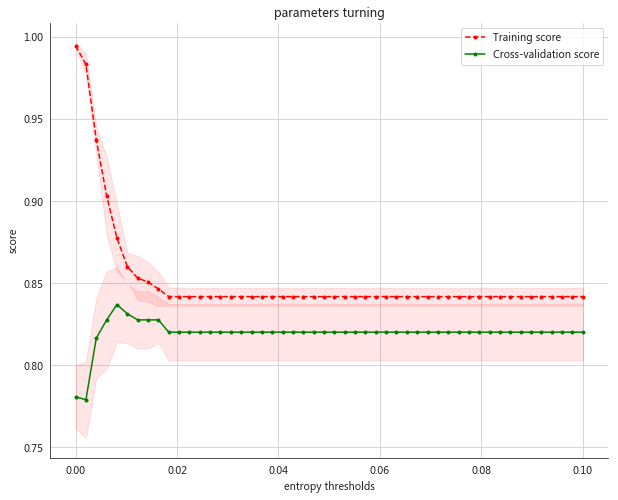

In [169]:
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    
    plt.figure(figsize=(10,8))
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, train_scores_mean-train_scores_std,
                    train_scores_mean+train_scores_std, alpha=.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean-test_scores_std,
                    test_scores_mean+test_scores_std, alpha=.1, color='r')
    plt.plot(train_sizes, train_scores_mean, '.r--', label='Training score')
    plt.plot(train_sizes, test_scores_mean, '.g-', label='Cross-validation score')
    
    plt.legend(loc='best')

plot_curve(entroy_threshold, clf.cv_results_, 'entropy thresholds')

In [170]:
gini_threshold = np.linspace(0, .01, 50)
parameters = {'min_impurity_decrease':gini_threshold}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

clf = GridSearchCV(DecisionTreeClassifier(criterion='gini',random_state=0),parameters, \
                   iid=False, cv=5,scoring=acc_scorer,return_train_score=True)
clf.fit(X_train, y_train)
print("best param: {0}\n best score: {1}".format(clf.best_params_, clf.best_score_))

best param: {'min_impurity_decrease': 0.004693877551020408}
 best score: 0.8406708595387841


In [171]:
clf.score(X_test, y_test)

0.7983193277310925

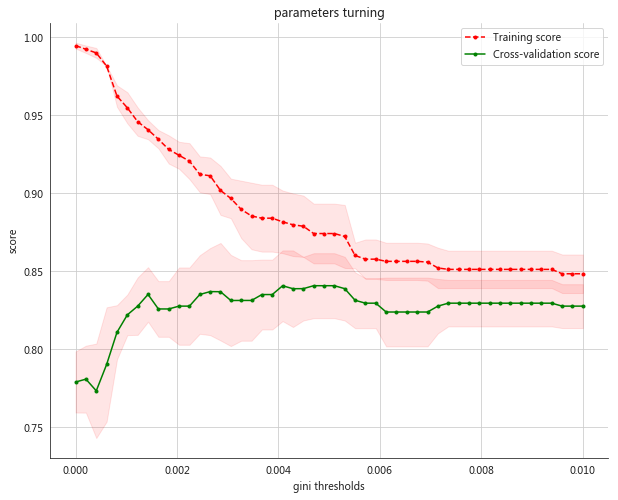

In [172]:
plot_curve(gini_threshold, clf.cv_results_, 'gini thresholds')

In [173]:
entropy_threshold = np.linspace(0, .1, 50)
gini_threshold = np.linspace(0, .01, 50)
parameters = [{'criterion':['entropy'],'min_impurity_decrease':entropy_threshold},
              {'criterion':['gini'], 'min_impurity_decrease':gini_threshold},
              {'max_depth': range(2,10)},
              {'min_samples_split': range(2,30,2)}]

clf = GridSearchCV(DecisionTreeClassifier(),parameters, 
                   iid=False, cv=5, scoring=acc_scorer, return_train_score=True)
clf.fit(X_train, y_train)
print("best param: {0}\n best score: {1}".format(clf.best_params_, clf.best_score_))

best param: {'criterion': 'gini', 'min_impurity_decrease': 0.004897959183673469}
 best score: 0.8406708595387841


In [174]:
clf.score(X_test, y_test)

0.8011204481792717

In [175]:
clf = DecisionTreeClassifier(criterion='gini', min_impurity_decrease=0.0034693877551020408)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))


from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='DcsTree.dot')

train score: 0.8782771535580525; test score: 0.8011204481792717


In [176]:
clf = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.012244897959183675)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

export_graphviz(clf, out_file='DcsTree2.dot')

train score: 0.8539325842696629; test score: 0.7983193277310925


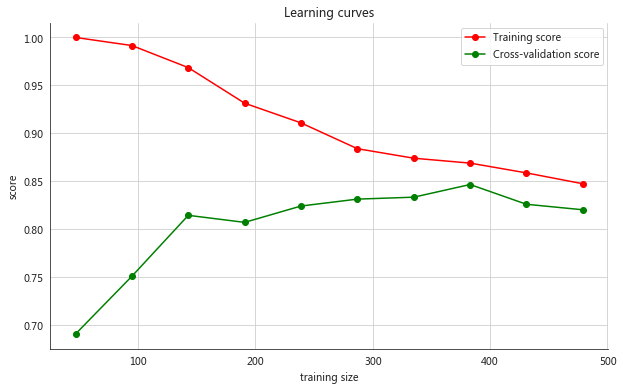

In [177]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores_clf, test_scores_clf \
= learning_curve(clf, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10),
                   scoring=acc_scorer, cv=10)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(train_sizes, train_scores_clf.mean(1), 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_clf.mean(1), 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("training size")
plt.ylabel("score")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()

In [178]:
def plot_learning_curve(plt, estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

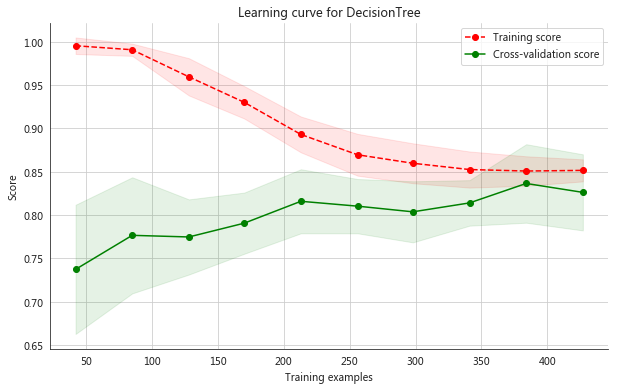

In [179]:
from sklearn.model_selection import ShuffleSplit

cv=ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(10,6))
plot_learning_curve(plt, clf, "Learning curve for DecisionTree", X_train, y_train, \
                    cv=cv, train_sizes=np.linspace(.1, 1.0, 10))
plt.show();

### Hyperparameters Tuning

**Logistic Regression**

In [211]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_feature",polynomial_features),
                        ("logistic_regression",logistic_regression)])
    return pipeline

In [212]:
model = polynomial_model(degree=2, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print("train_score:{};cv_score:{}".format(train_score,cv_score))

train_score:0.9119850187265918;cv_score:0.7955182072829131


In [236]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

param_grid = {"C":np.linspace(0.001,1.0,50),
              "solver":['liblinear','newton-cg', 'lbfgs']}
model = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=cv, iid=False)
model.fit(X_train, y_train)

print("best_params:{}\nbest_score:{}".format(model.best_params_, model.best_score_))

best_params:{'C': 0.021387755102040818, 'solver': 'newton-cg'}
best_score:0.8411214953271028


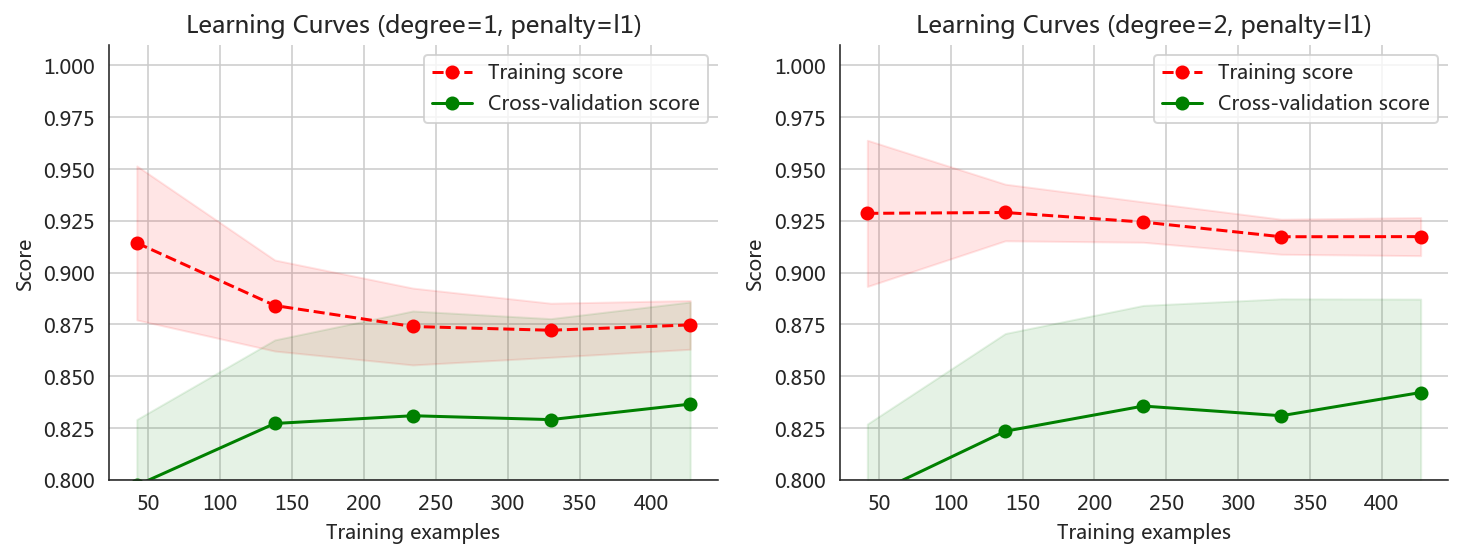

In [214]:
title = 'Learning Curves (degree={0}, penalty={1})'
degrees = [1, 2]
penalty = 'l1'

plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, polynomial_model(degree=degrees[i], penalty=penalty, 
                                              solver='liblinear',max_iter=500), 
                        title.format(degrees[i], penalty), X_train, y_train, ylim=(0.8, 1.01), cv=cv)

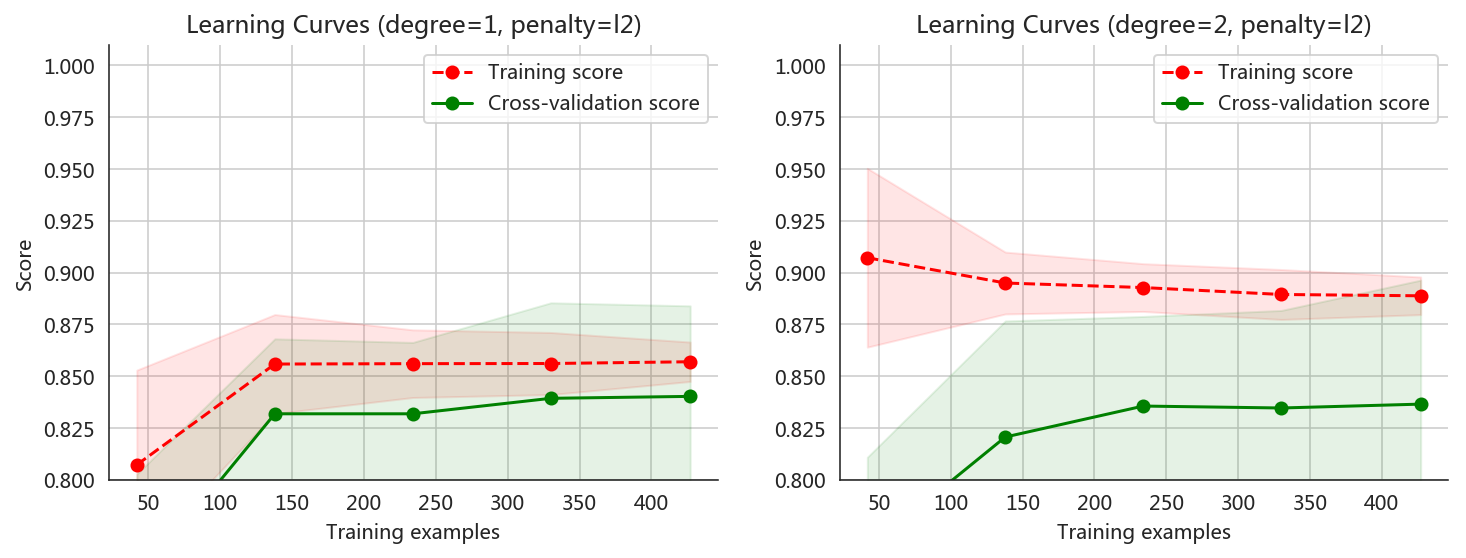

In [215]:
title = 'Learning Curves (degree={0}, penalty={1})'
degrees = [1, 2]
penalty = 'l2'

plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, polynomial_model(degree=degrees[i], penalty=penalty, 
                                              solver='newton-cg', C=0.01, max_iter=300), 
                        title.format(degrees[i], penalty), X_train, y_train, ylim=(0.8, 1.01), cv=cv)

In [216]:
model = polynomial_model(degree=2, penalty='l2', solver='newton-cg', C=0.01)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print("train_score:{};cv_score:{}".format(train_score,cv_score))

train_score:0.8857677902621723;cv_score:0.8123249299719888


对于degree=2的模型没有足够的数据供训练，出现很高有variance.

**AdaBoost Classifier**

In [217]:
from sklearn.ensemble import AdaBoostClassifier
param_grid={'n_estimators':[30,50,80,120,200],'learning_rate':[0.01,0.05,0.1,0.5,1]}
AdaBC=GridSearchCV(AdaBoostClassifier(),param_grid,cv=5, iid=False)

AdaBC.fit(X_train,y_train)

AdaBC.best_params_,AdaBC.best_score_

({'learning_rate': 0.1, 'n_estimators': 80}, 0.842627533193571)

In [220]:
AdaBC.score(X_test, y_test)

0.7871148459383753

**Gradient Boosting Decision Tree**

In [221]:
param_grid={'n_estimators':[30,50,80,120,200],'learning_rate':[0.01,0.05,0.1,0.5,1],'max_depth':[1,2,3,4,5,6]}
grid_search=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5, iid=False)

grid_search.fit(X_train,y_train)

grid_search.best_params_,grid_search.best_score_

({'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 80},
 0.8519916142557651)

In [222]:
GBC = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01,max_depth=5)
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)
accuracy_score(y_pred, y_test)

0.803921568627451

In [223]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[193  14]
 [ 56  94]]


**RandomForest Classifier**

In [224]:
# Choose the type of classifier. 
rfc = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [6, 8, 10], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'min_impurity_decrease':np.linspace(0,.1,50),
              'max_depth': [3, 5, 10], 
              'min_samples_split': [3, 5],
              'min_samples_leaf': [5, 8]
             }

# Run the grid search
clf = GridSearchCV(rfc, parameters, scoring=acc_scorer,iid=False,cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'n_estimators': [6, 8, 10], 'max_features': ['log2', 'sqrt', 'auto'], 'criterion': ['entropy', 'gini'], 'min_impurity_decrease': array([0.     , 0.00204, 0.00408, 0.00612, 0.00816, 0.0102 , 0.01224,
       0.01429, 0.01633, 0.01837, 0.02041, 0.02245, 0.02449, 0.02653,
       0.02857, 0.0...
       0.1    ]), 'max_depth': [3, 5, 10], 'min_samples_split': [3, 5], 'min_samples_leaf': [5, 8]},
       pre_dispatch='2*n_jobs', refit=True

In [225]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}\ntest score: {1}'.format(train_score, test_score))

train score: 0.8801498127340824
test score: 0.8123249299719888


In [228]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8123249299719888


In [229]:
def run_kfold(clf):
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X1):
        fold += 1
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = y1[train_index], y1[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

Fold 1 accuracy: 0.8222222222222222
Fold 2 accuracy: 0.8202247191011236
Fold 3 accuracy: 0.7640449438202247
Fold 4 accuracy: 0.8426966292134831
Fold 5 accuracy: 0.8314606741573034
Fold 6 accuracy: 0.8314606741573034
Fold 7 accuracy: 0.8089887640449438
Fold 8 accuracy: 0.7752808988764045
Fold 9 accuracy: 0.8764044943820225
Fold 10 accuracy: 0.8314606741573034
Mean Accuracy: 0.8204244694132334


**k-Nearest Neighbors**

In [231]:
param_grid={'n_neighbors':[4,5,6,7,8,9]}
grid_search=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

grid_search.fit(X_scaled,y1)

grid_search.best_params_,grid_search.best_score_

({'n_neighbors': 8}, 0.8249158249158249)

**Support Vector Machine**

In [233]:
param_grid={'C':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
grid_search=GridSearchCV(SVC(),param_grid,cv=5)

grid_search.fit(X_scaled,y1)

grid_search.best_params_,grid_search.best_score_

({'C': 10, 'gamma': 0.01}, 0.8316498316498316)

In [235]:
#second round grid search
param_grid={'C':[2,4,6,8,10,12,14],'gamma':[0.008,0.01,0.012,0.015,0.02]}
grid_search=GridSearchCV(SVC(),param_grid,cv=5)

grid_search.fit(X_scaled,y1)

grid_search.best_params_,grid_search.best_score_

({'C': 6, 'gamma': 0.008}, 0.8361391694725028)

### Ensemble Methods

#### Bagging

In [237]:
from sklearn.ensemble import BaggingClassifier

bagging=BaggingClassifier(LogisticRegression(C=0.02),n_estimators=100)

#### VotingClassifier

In [238]:
from sklearn.ensemble import VotingClassifier

In [239]:
clf1=LogisticRegression(C=0.02)
clf2=RandomForestClassifier(n_estimators=500)
clf3=GradientBoostingClassifier(n_estimators=80,learning_rate=0.05,max_depth=3)
clf4=SVC(C=6,gamma=0.008,probability=True)
clf5=KNeighborsClassifier(n_neighbors=8)

In [240]:
eclf_hard=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)])

In [241]:
# add weights
eclfW_hard=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)],
                            weights=[1,1,2,2,1])

In [242]:
# soft voting
eclf_soft=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)],voting='soft')

In [243]:
# add weights
eclfW_soft=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)],voting='soft',
                            weights=[1,1,2,2,1])

In [244]:
models=[KNeighborsClassifier(n_neighbors=8),LogisticRegression(C=0.02),GaussianNB(),DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=500),
        GradientBoostingClassifier(n_estimators=80,learning_rate=0.05,max_depth=3),
        SVC(C=6,gamma=0.008,probability=True),
        eclf_hard, eclf_soft, eclfW_hard, eclfW_soft, bagging]

In [246]:
names=['KNN','LR','NB','CART','RF','GBT','SVM','VC_hard','VC_soft','VCW_hard','VCW_soft','Bagging']
for name,model in zip(names,models):
    score=cross_val_score(model,X_scaled,y1,cv=5)
    print("{}: {},{}".format(name,score.mean(),score))

KNN: 0.8249304646060146,[0.83798883 0.81005587 0.85393258 0.78651685 0.83615819]
LR: 0.820492718067003,[0.81564246 0.79329609 0.81460674 0.83146067 0.84745763]
NB: 0.7430895312305503,[0.70949721 0.73743017 0.75280899 0.71910112 0.79661017]
CART: 0.7912660424351201,[0.79329609 0.77653631 0.80898876 0.78089888 0.79661017]
RF: 0.805841611440864,[0.83240223 0.78212291 0.84269663 0.75842697 0.81355932]
GBT: 0.8294754178241123,[0.82122905 0.81005587 0.83707865 0.81460674 0.86440678]
SVM: 0.8362045785727787,[0.83798883 0.81564246 0.83707865 0.81460674 0.87570621]
VC_hard: 0.8384075463855958,[0.84916201 0.82122905 0.84269663 0.8258427  0.85310734]
VC_soft: 0.8361729804414304,[0.83798883 0.82681564 0.84269663 0.81460674 0.85875706]
VCW_hard: 0.8406674333912456,[0.84916201 0.82122905 0.84269663 0.8258427  0.86440678]
VCW_soft: 0.8339447624944721,[0.83240223 0.82681564 0.8258427  0.81460674 0.8700565 ]
Bagging: 0.821616384499964,[0.81564246 0.79888268 0.81460674 0.8258427  0.85310734]


#### Stacking

In [250]:
from sklearn.model_selection import StratifiedKFold
n_train=X1.shape[0]
n_test=X2.shape[0]
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)  

In [248]:
def get_oof(clf,X,y,test_X):
    oof_train=np.zeros((n_train,))
    oof_test_mean=np.zeros((n_test,))
    oof_test_single=np.empty((5,n_test))
    for i, (train_index,val_index) in enumerate(kf.split(X,y)):
        kf_X_train=X[train_index]
        kf_y_train=y[train_index]
        kf_X_val=X[val_index]
        
        clf.fit(kf_X_train,kf_y_train)
        
        oof_train[val_index]=clf.predict(kf_X_val)
        oof_test_single[i,:]=clf.predict(test_X)
    oof_test_mean=oof_test_single.mean(axis=0)
    return oof_train.reshape(-1,1), oof_test_mean.reshape(-1,1)

In [251]:
LR_train,LR_test=get_oof(LogisticRegression(C=0.02),X_scaled,y1,X_test_scaled)
KNN_train,KNN_test=get_oof(KNeighborsClassifier(n_neighbors=8),X_scaled,y1,X_test_scaled)
SVM_train,SVM_test=get_oof(SVC(C=6,gamma=0.008),X_scaled,y1,X_test_scaled)
GBDT_train,GBDT_test=get_oof(GradientBoostingClassifier(n_estimators=80,
                                                        learning_rate=0.05,max_depth=3),X_scaled,y1,X_test_scaled)

In [253]:
X_stack=np.concatenate((LR_train,KNN_train,SVM_train,GBDT_train),axis=1)
y_stack=y1
X_test_stack=np.concatenate((LR_test,KNN_test,SVM_test,GBDT_test),axis=1)

In [254]:
X_stack.shape,y_stack.shape,X_test_stack.shape

((891, 4), (891,), (418, 4))

In [255]:
stack_score=cross_val_score(RandomForestClassifier(n_estimators=1000),X_stack,y_stack,cv=5)

In [256]:
# cross-validation score of stacking
stack_score.mean(),stack_score

(0.8339636646314066,
 array([0.83798883, 0.81005587, 0.83146067, 0.81460674, 0.87570621]))

In [259]:
pred=RandomForestClassifier(n_estimators=500).fit(X_stack,y_stack).predict(X_test_stack)
tt=pd.DataFrame({'PassengerId':titanic_est1.index[891:],'Survived':pred})
tt.to_csv('G.csv',index=False)

## 结论的限制性   
1. 据了解titanic船上人数总数为2224人，遇难人数逾1500人，而此数据集仅有891人，未生还人数为549人，此与真实数据不符导致所做的分析结果失真。　　　
2. 部分数据缺失，例如此数据集中年龄栏有177项空缺，填空的值与实际情况可能存在一定的差异。    
3. 除了现有提供的因素外，可能存在其他因素影响生还率。  